In [25]:
df = pd.read_csv('./input/SINASC_RO_2019.csv')

df[df['DTNASC'] < '2019-02-01'].to_csv('./input/SINASC_RO_2019_JAN.csv')
df[df['DTNASC'] < '2019-03-01'].to_csv('./input/SINASC_RO_2019_FEV.csv')
df[df['DTNASC'] < '2019-04-01'].to_csv('./input/SINASC_RO_2019_MAR.csv')
df[df['DTNASC'] < '2019-05-01'].to_csv('./input/SINASC_RO_2019_ABR.csv')
df[df['DTNASC'] < '2019-06-01'].to_csv('./input/SINASC_RO_2019_MAI.csv')
df[df['DTNASC'] < '2019-07-01'].to_csv('./input/SINASC_RO_2019_JUN.csv')
df[df['DTNASC'] < '2019-08-01'].to_csv('./input/SINASC_RO_2019_JUL.csv')
df[df['DTNASC'] < '2019-09-01'].to_csv('./input/SINASC_RO_2019_AGO.csv')
df[df['DTNASC'] < '2019-10-01'].to_csv('./input/SINASC_RO_2019_SET.csv')
df[df['DTNASC'] < '2019-11-01'].to_csv('./input/SINASC_RO_2019_OUT.csv')
df[df['DTNASC'] < '2019-12-01'].to_csv('./input/SINASC_RO_2019_NOV.csv')
df[df['DTNASC'] < '2020-01-01'].to_csv('./input/SINASC_RO_2019_DEZ.csv')

JAN = pd.read_csv('./input/SINASC_RO_2019_JAN.csv')
FEV = pd.read_csv('./input/SINASC_RO_2019_FEV.csv')
MAR = pd.read_csv('./input/SINASC_RO_2019_MAR.csv')
ABR = pd.read_csv('./input/SINASC_RO_2019_ABR.csv')
MAI = pd.read_csv('./input/SINASC_RO_2019_MAI.csv')
JUN = pd.read_csv('./input/SINASC_RO_2019_JUN.csv')
JUL = pd.read_csv('./input/SINASC_RO_2019_JUL.csv')
AGO = pd.read_csv('./input/SINASC_RO_2019_AGO.csv')
SET = pd.read_csv('./input/SINASC_RO_2019_SET.csv')
OUT = pd.read_csv('./input/SINASC_RO_2019_OUT.csv')
NOV = pd.read_csv('./input/SINASC_RO_2019_NOV.csv')
DEZ = pd.read_csv('./input/SINASC_RO_2019_DEZ.csv')

meses = [JAN, FEV, MAR, ABR, MAI, JUN, JUL, AGO, SET, OUT, NOV, DEZ]

# Módulo 14 – Tarefa 1
- ### Crie um jupyter notebook com os imports necessários e um código para gerar os gráficos referentes a base de dados de março, abril, maio, junho e dezembro (numa célula só ou em várias).

2019-01-01 2019-01-31
2019-01
2019-01-01 2019-02-28
2019-02
2019-01-01 2019-03-31
2019-03
2019-01-01 2019-04-30
2019-04


C:\ProgramData\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


2019-01-01 2019-05-31
2019-05
2019-01-01 2019-06-30
2019-06
2019-01-01 2019-07-31
2019-07
2019-01-01 2019-08-31
2019-08
2019-01-01 2019-09-30
2019-09
2019-01-01 2019-10-31
2019-10
2019-01-01 2019-11-30
2019-11
2019-01-01 2019-12-31
2019-12


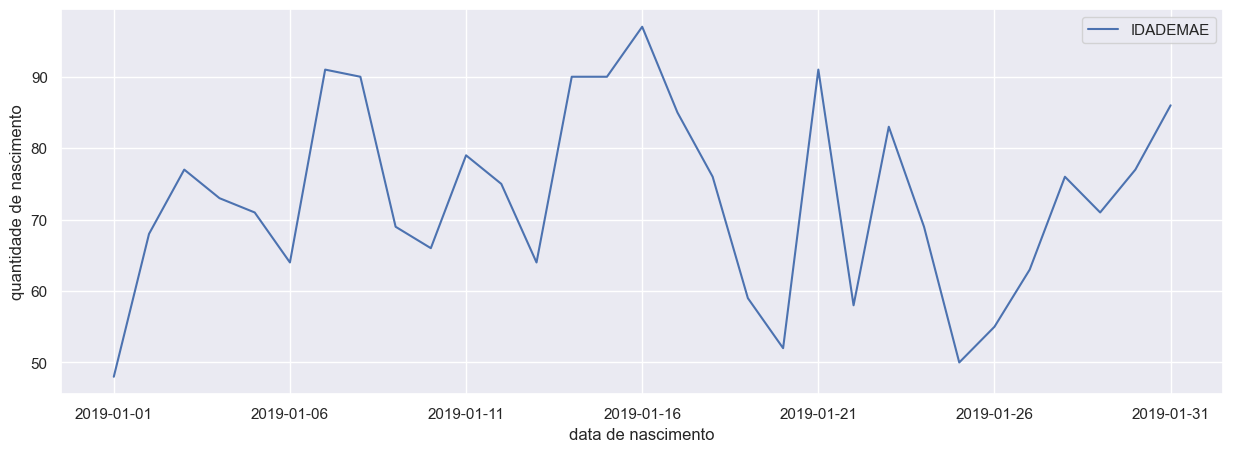

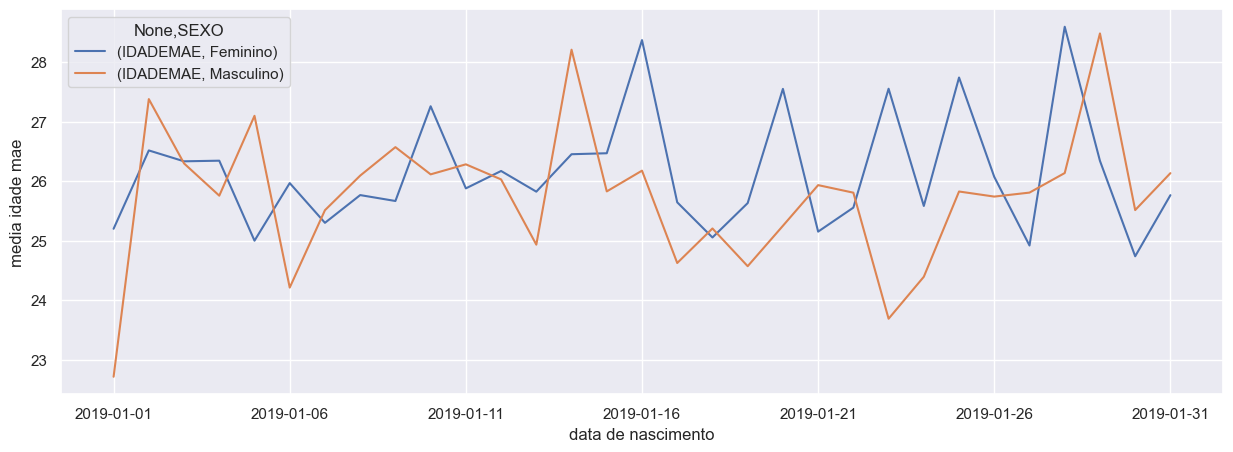

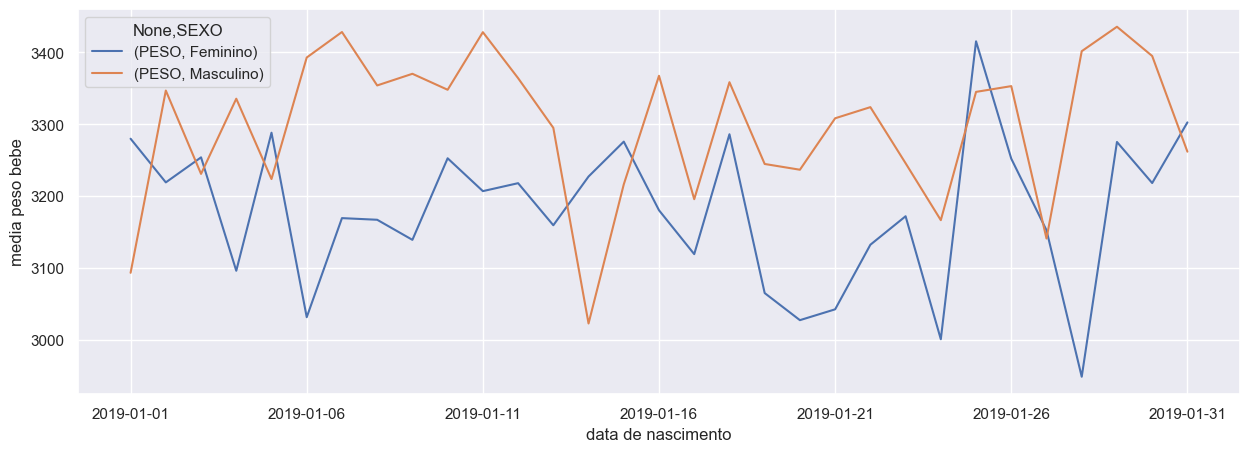

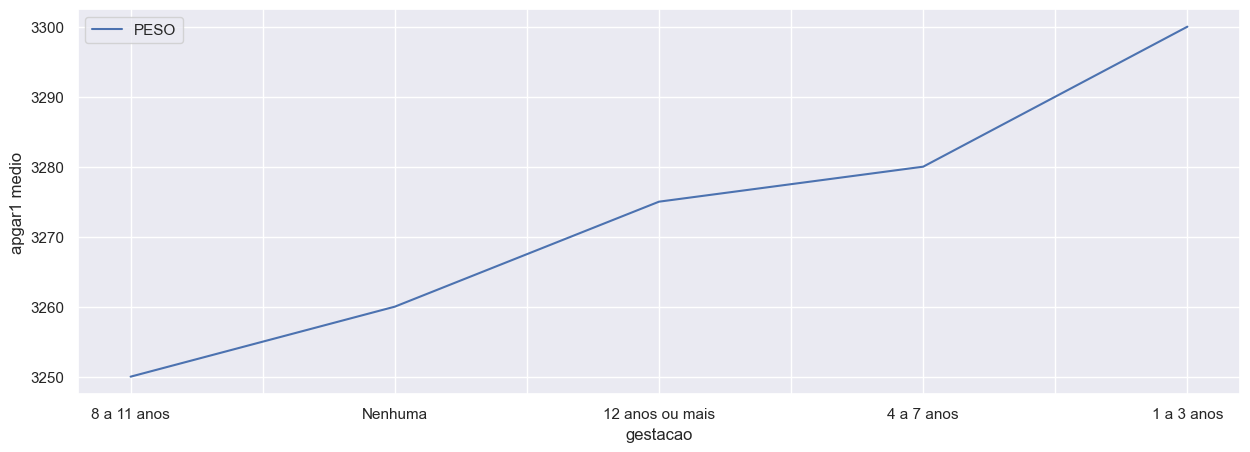

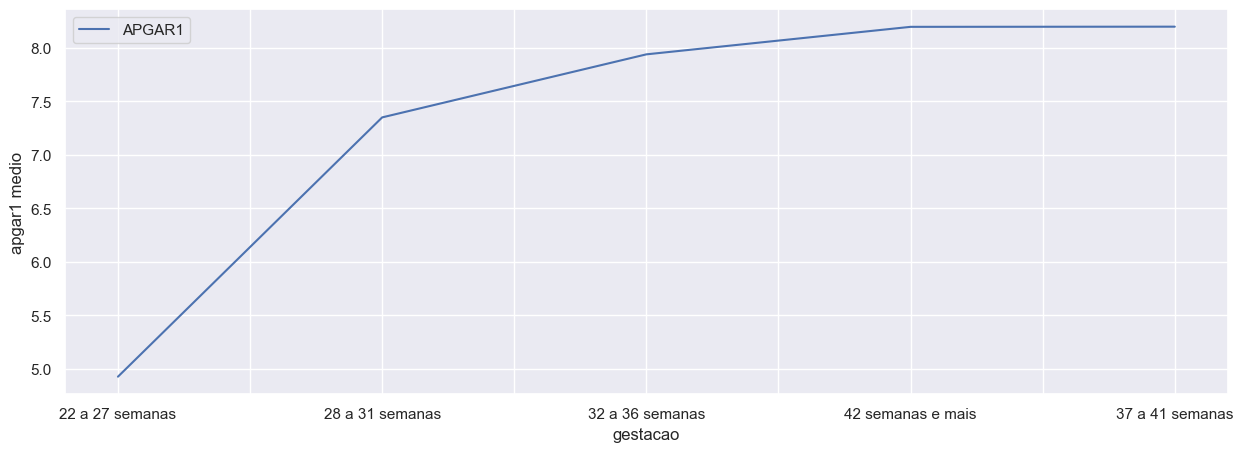

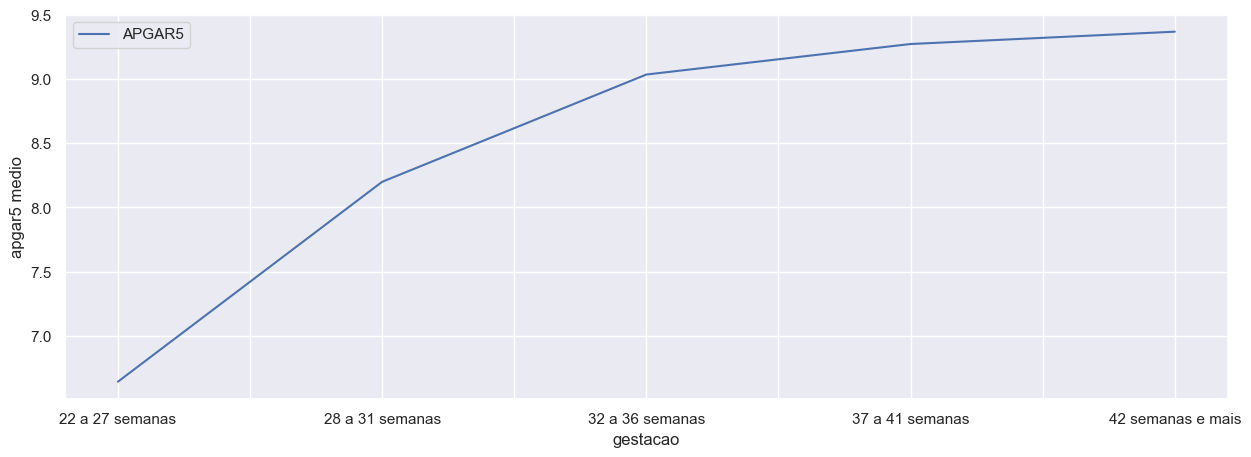

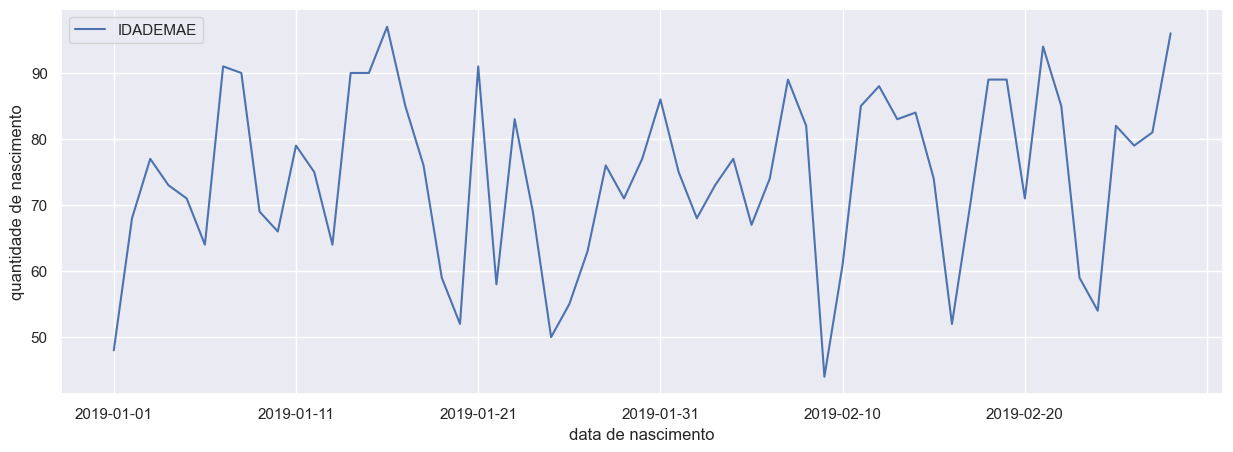

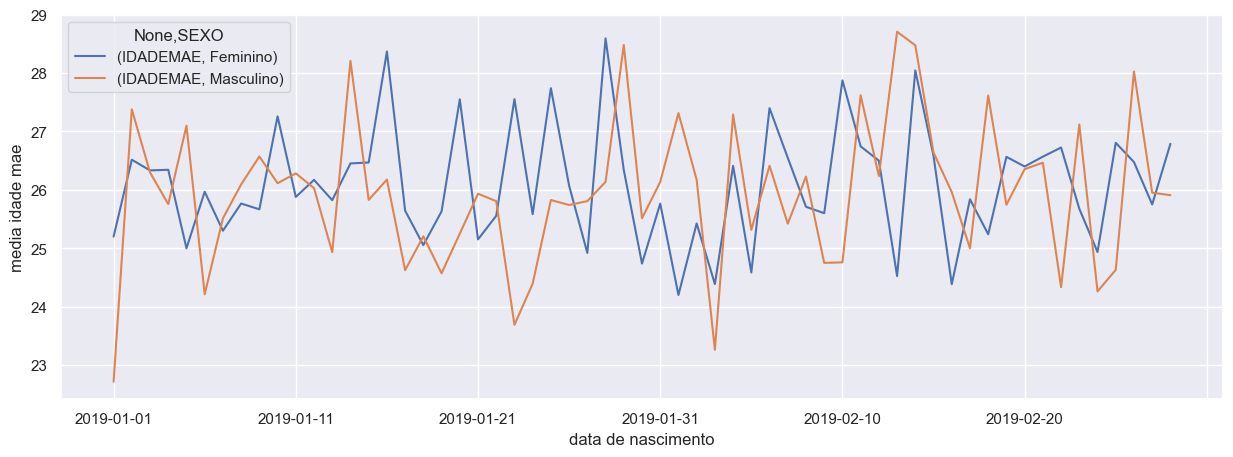

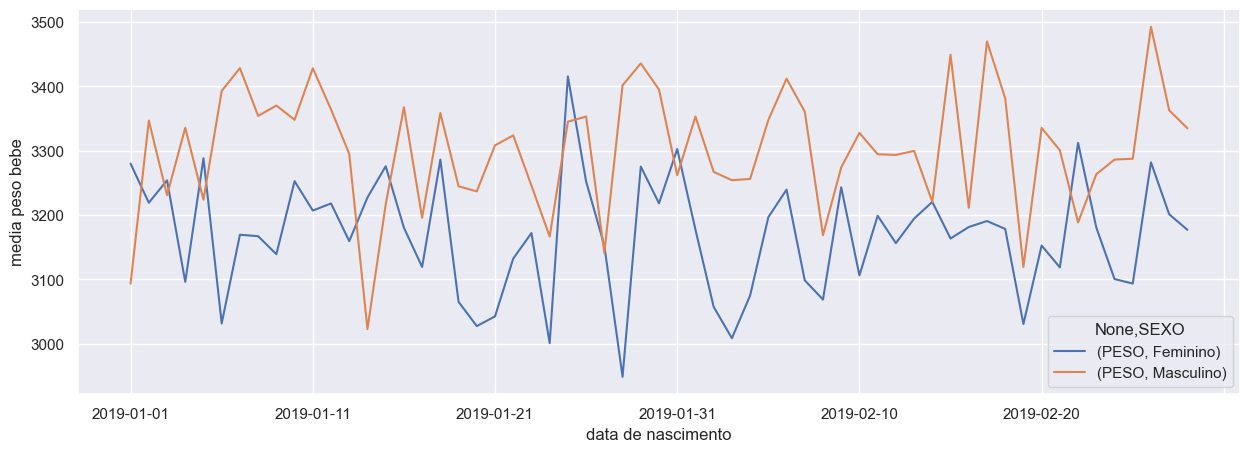

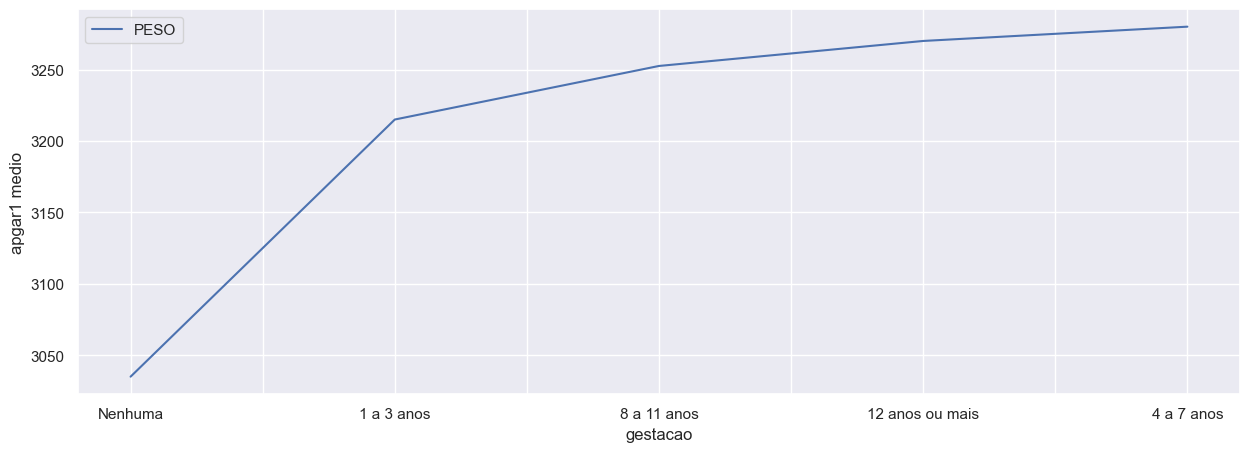

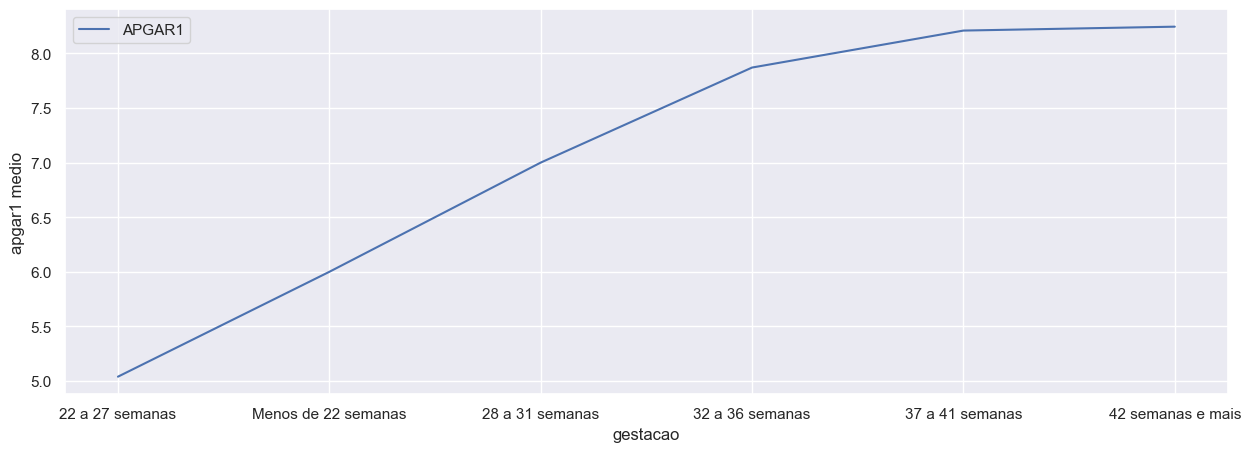

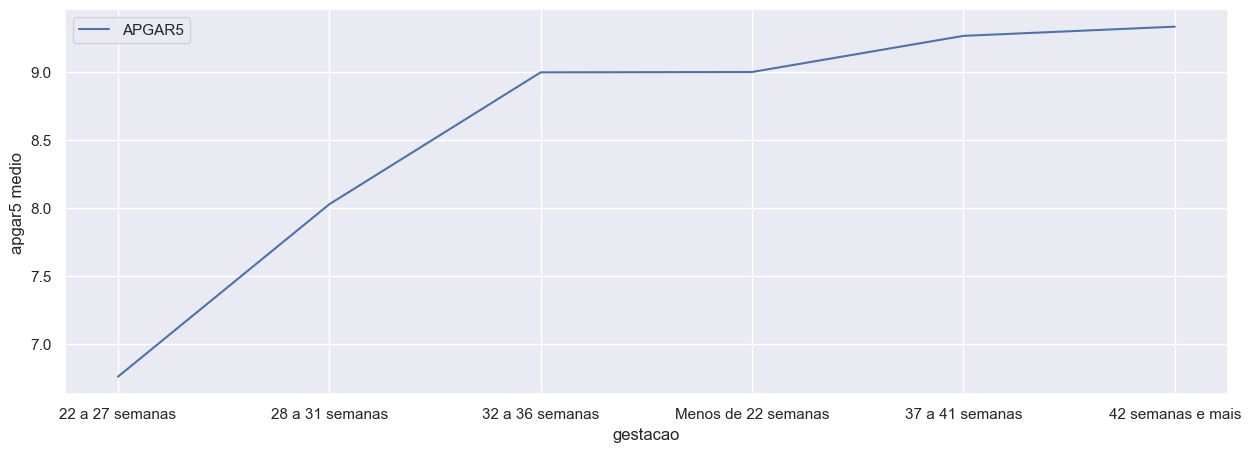

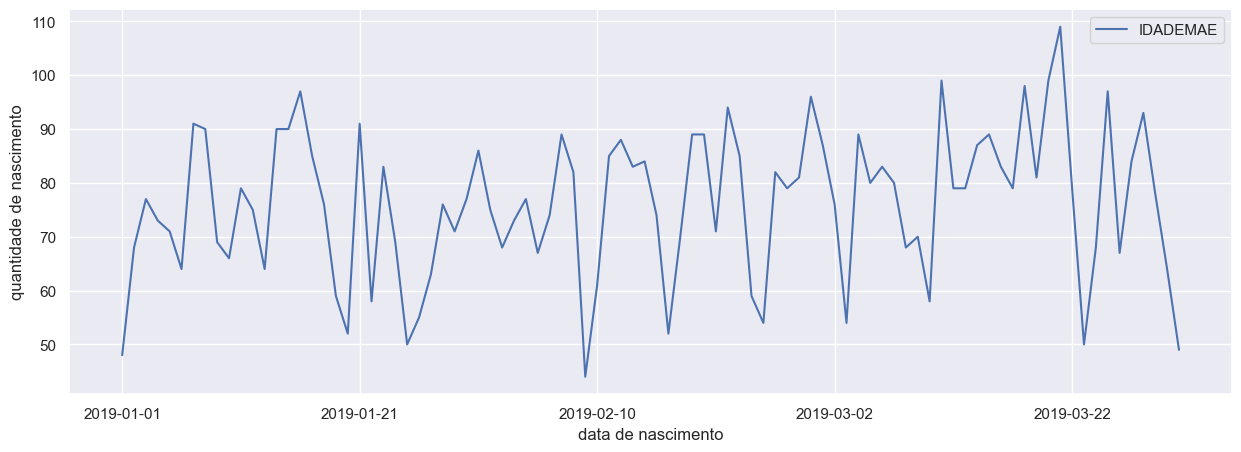

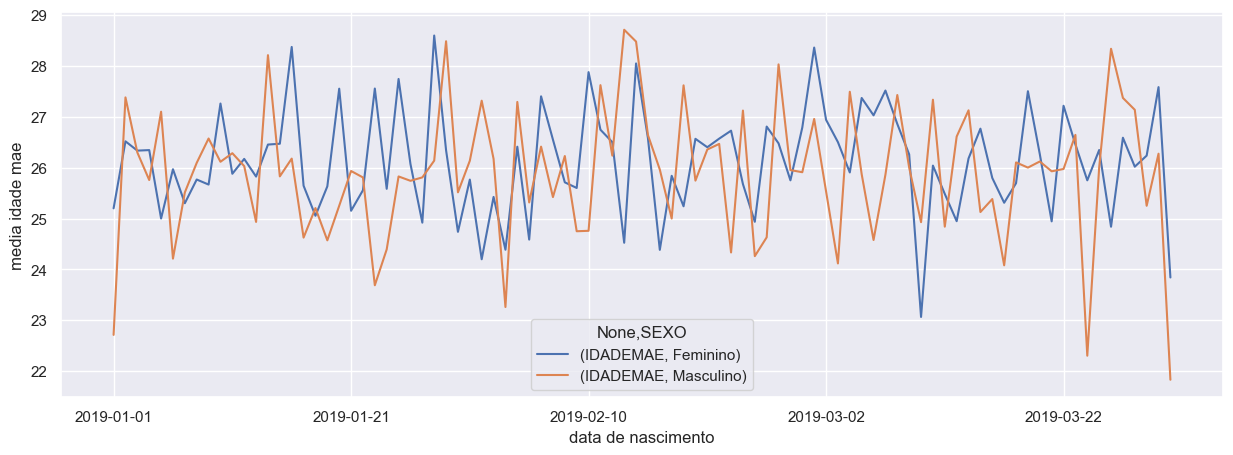

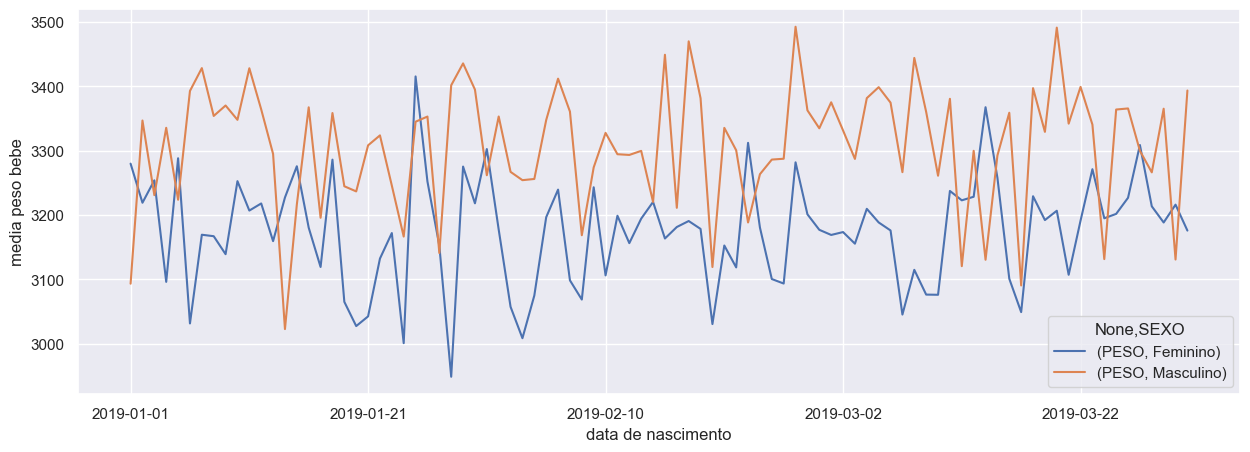

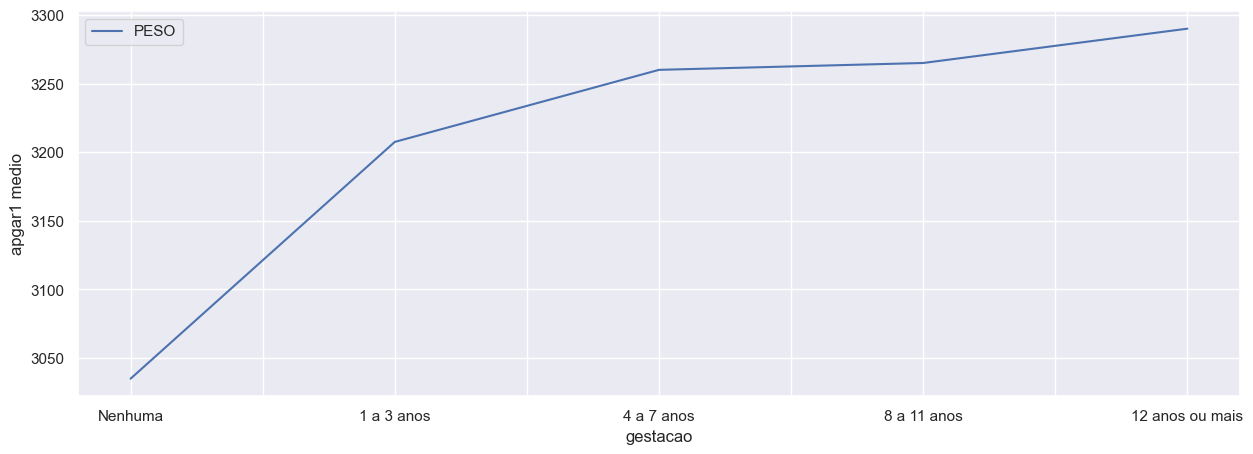

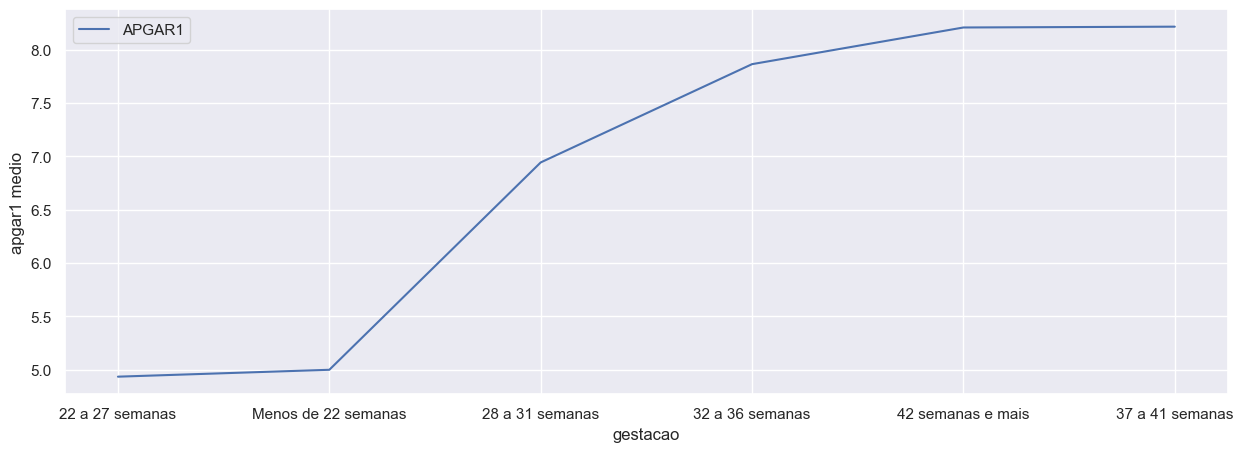

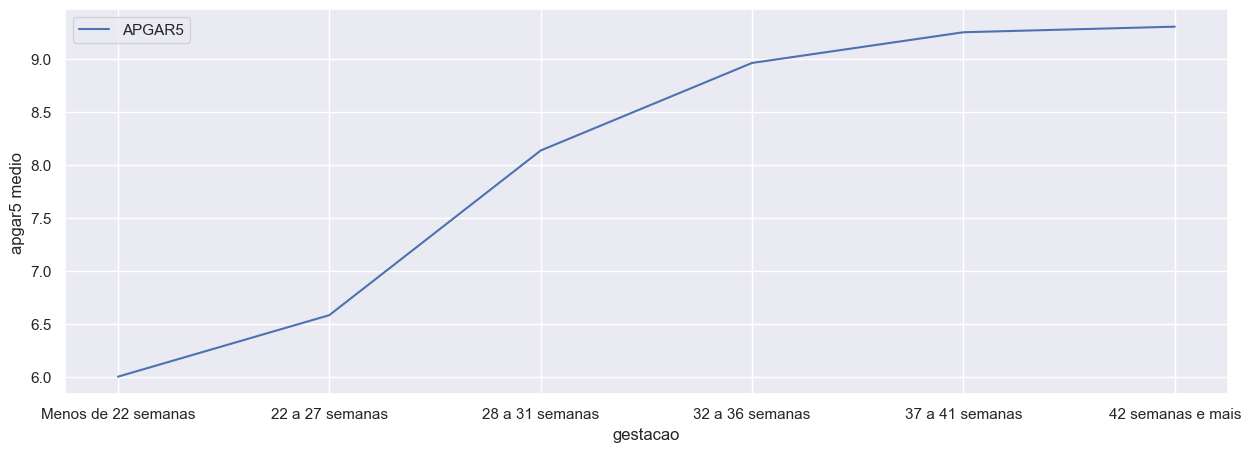

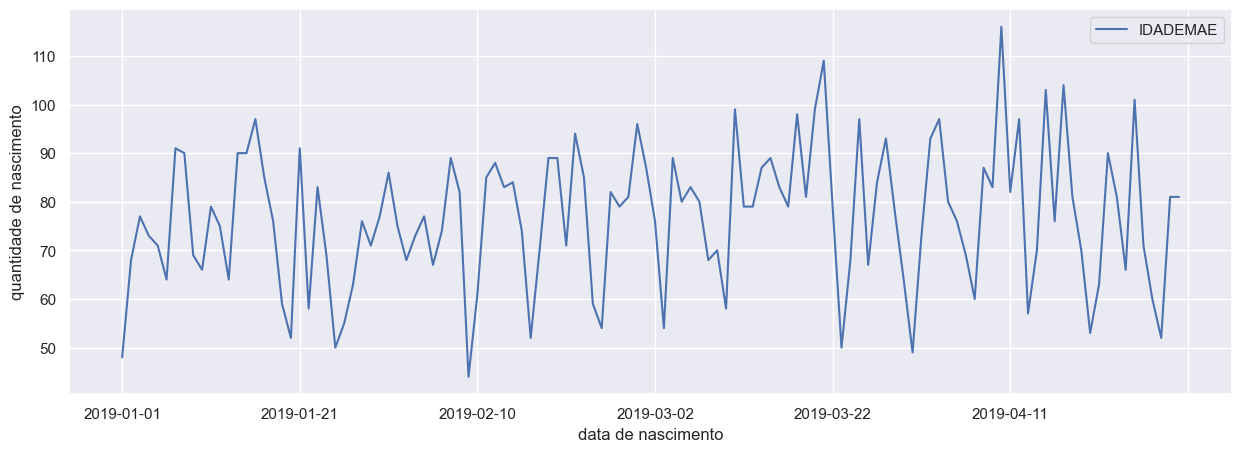

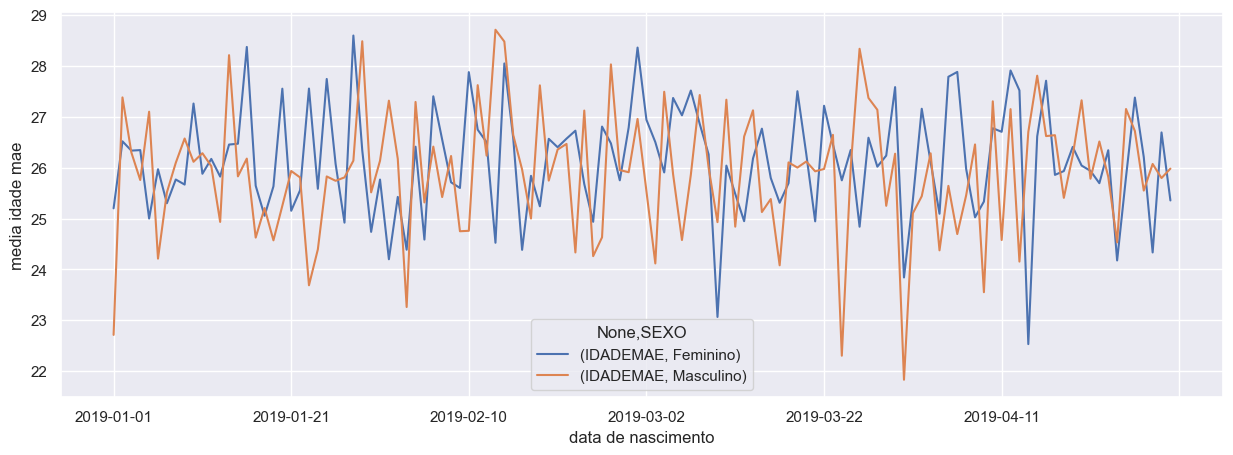

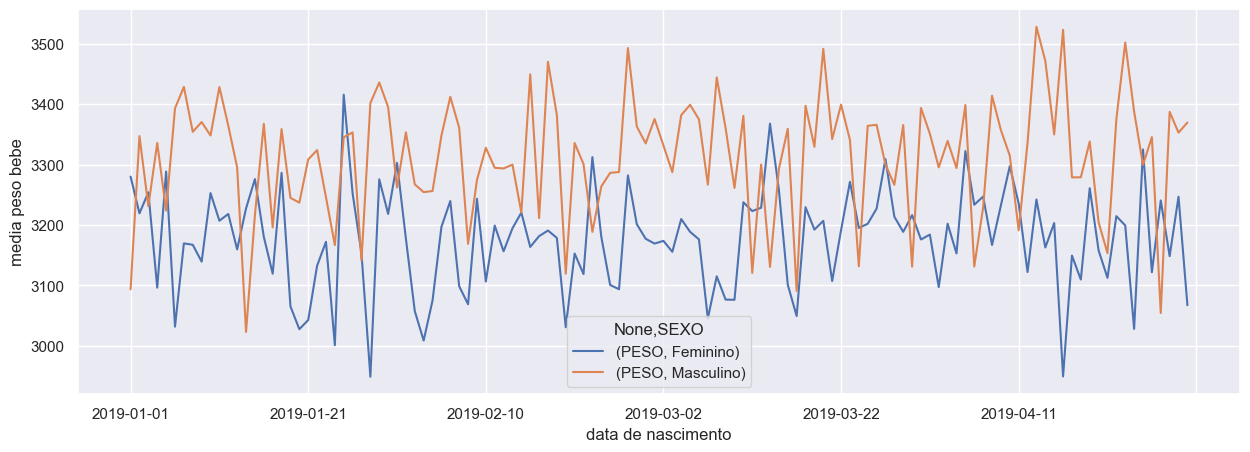

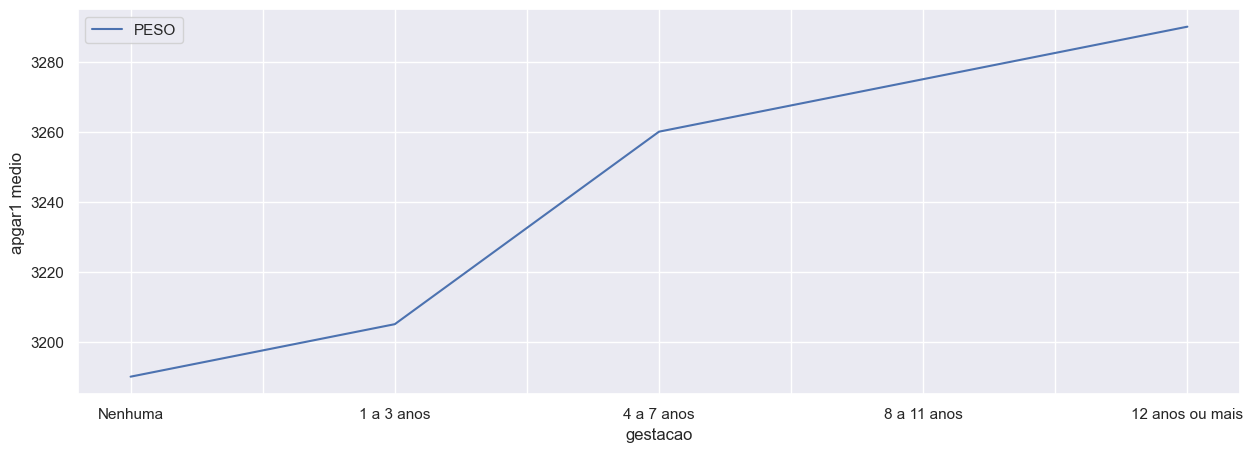

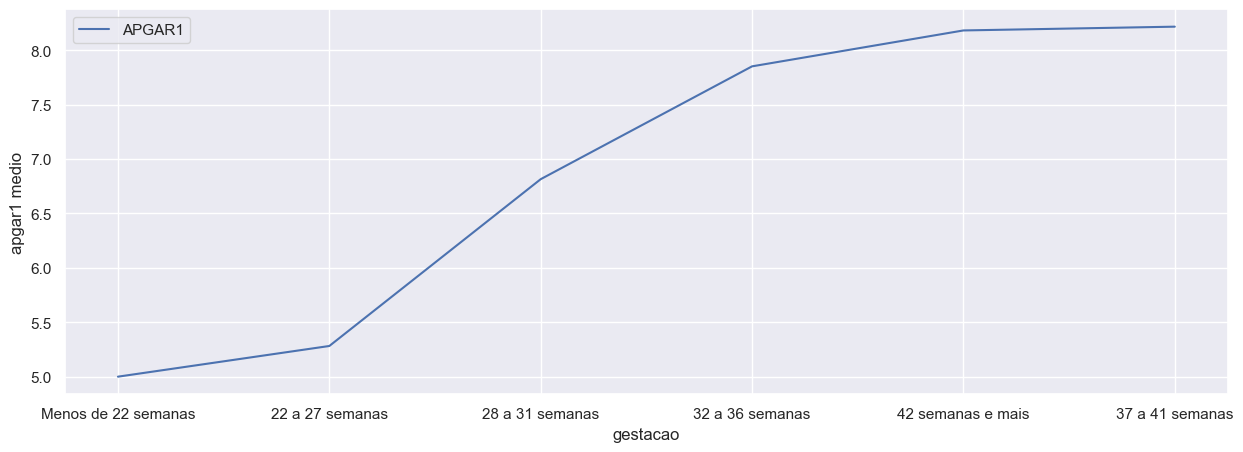

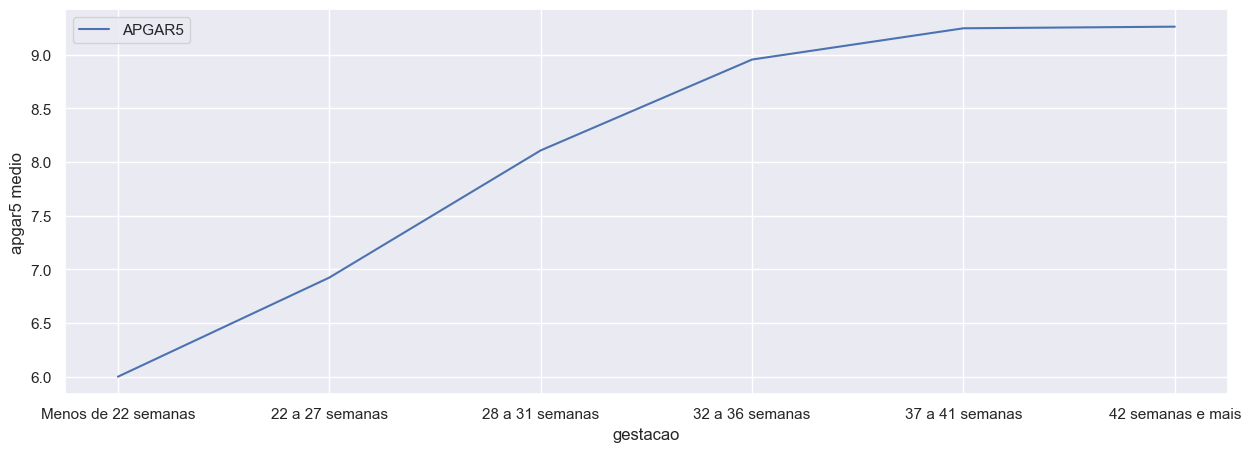

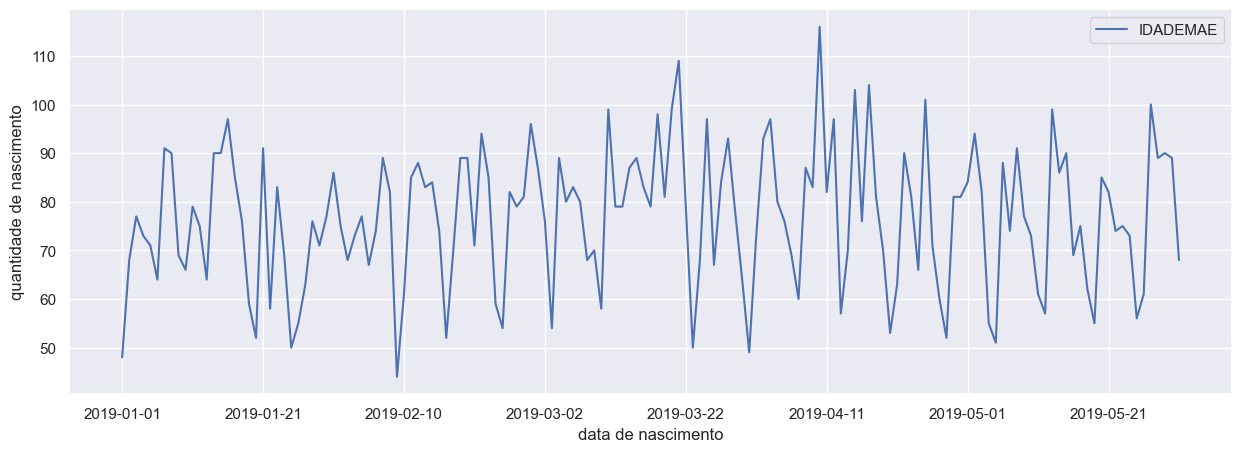

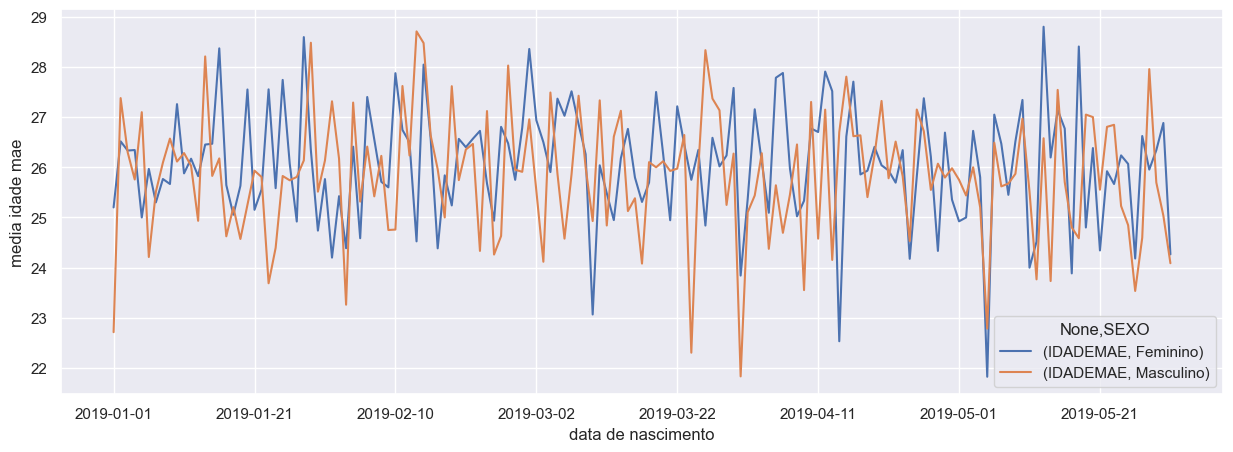

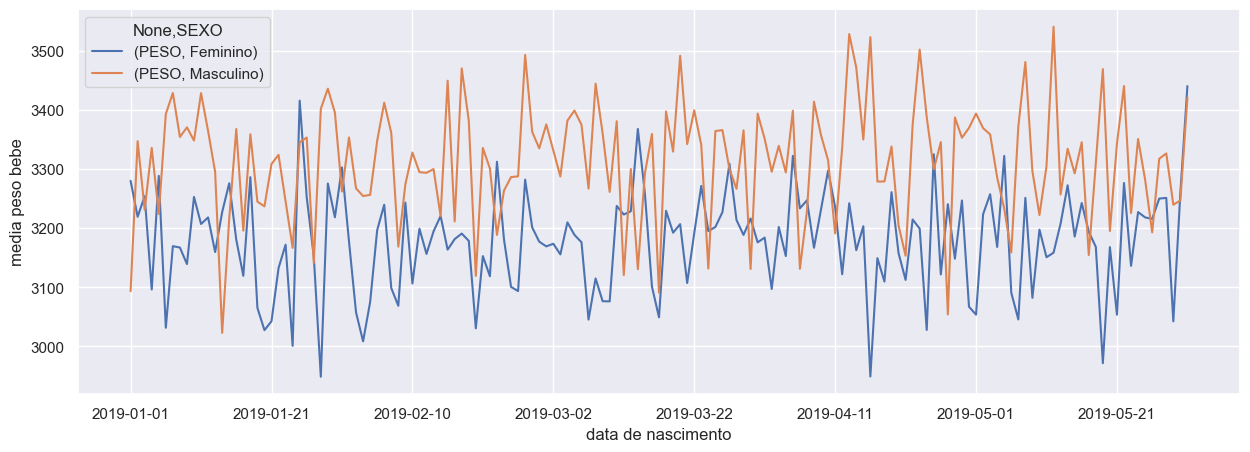

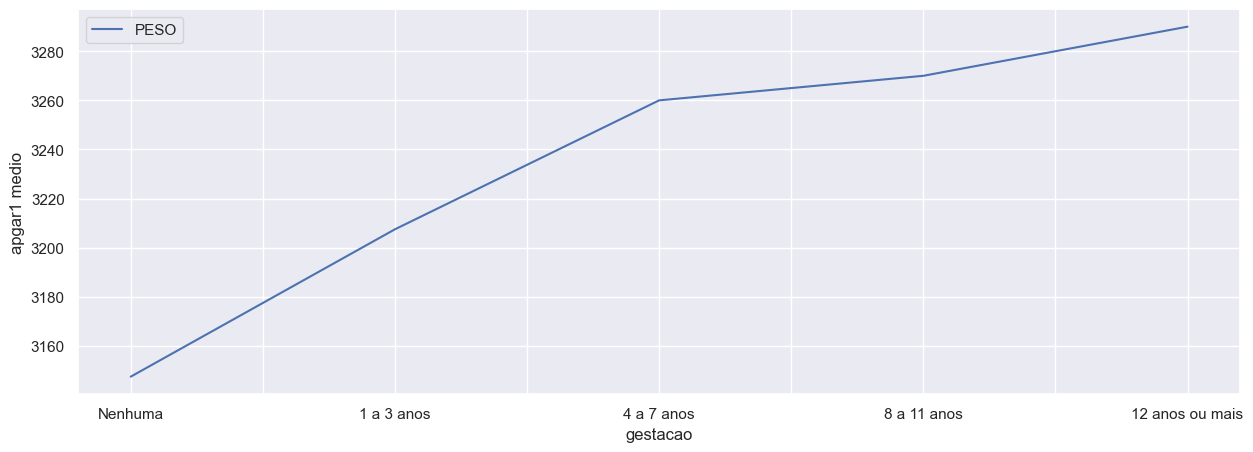

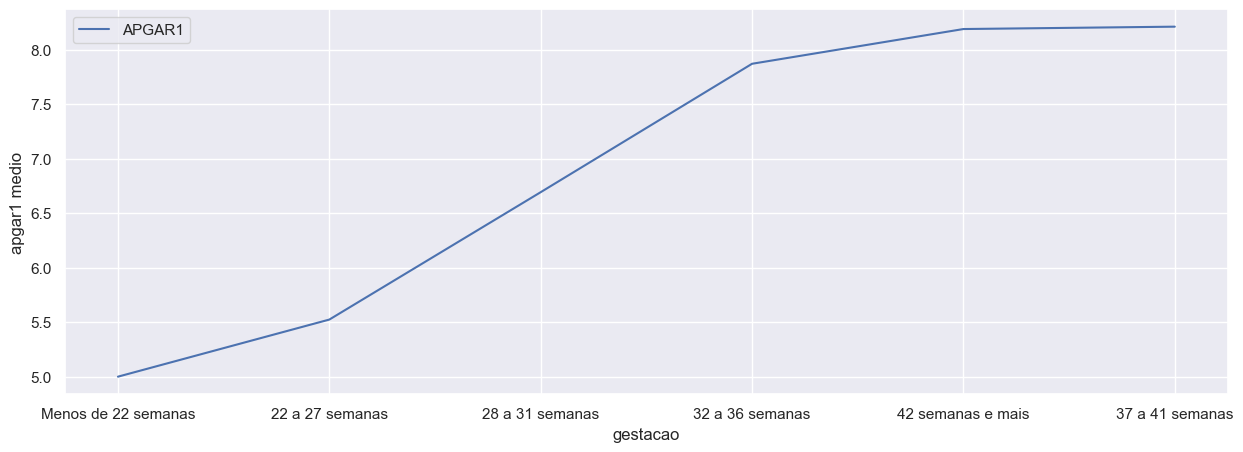

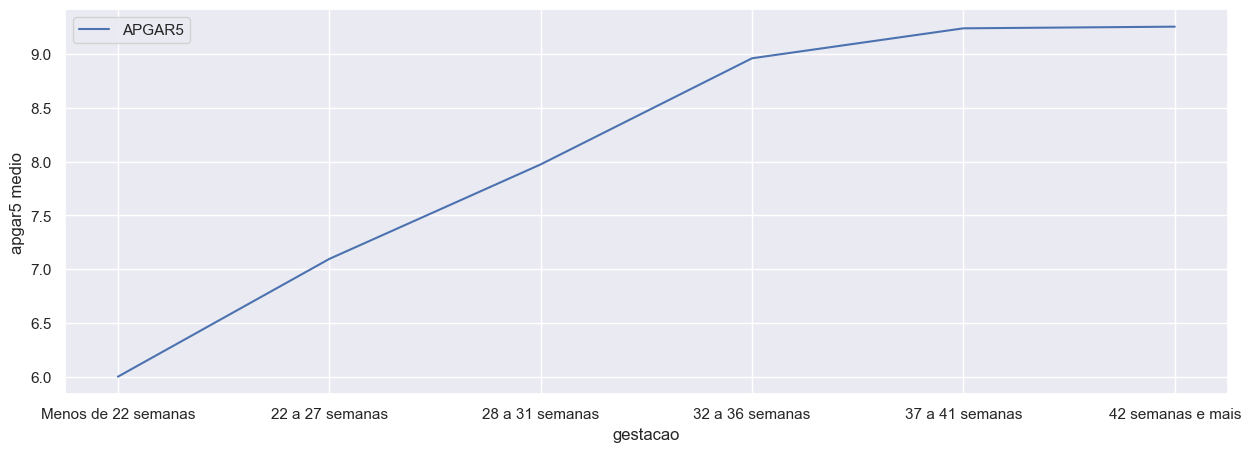

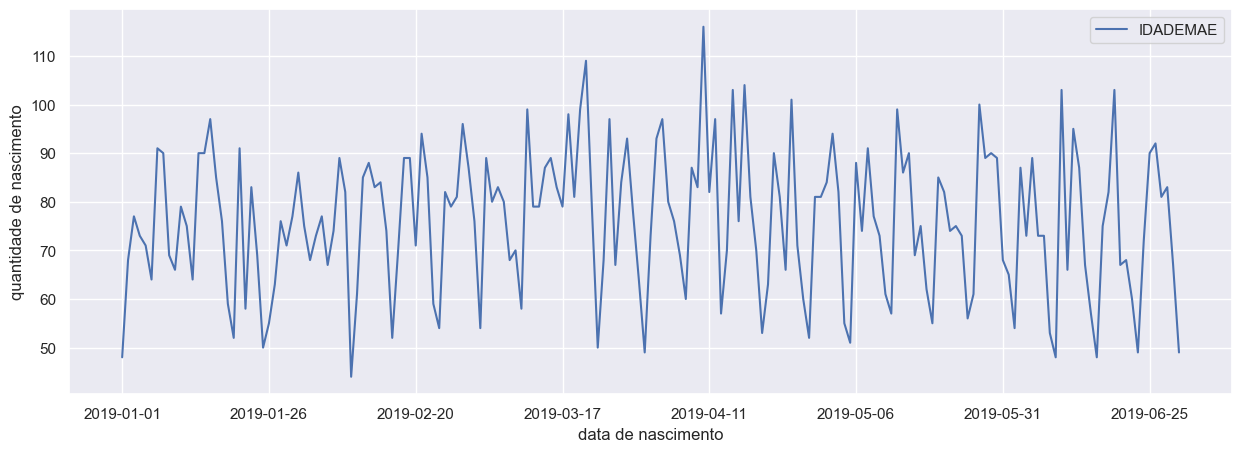

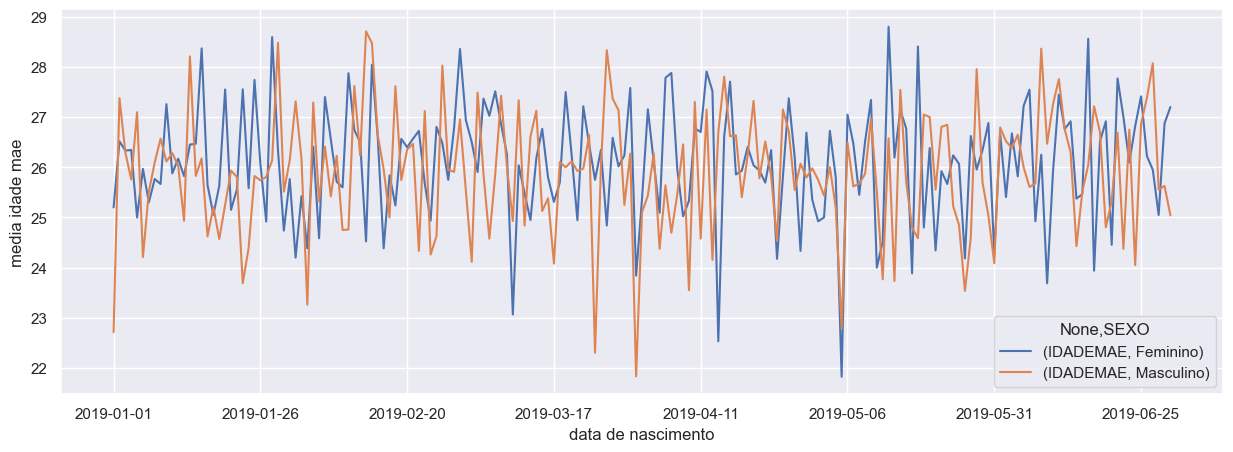

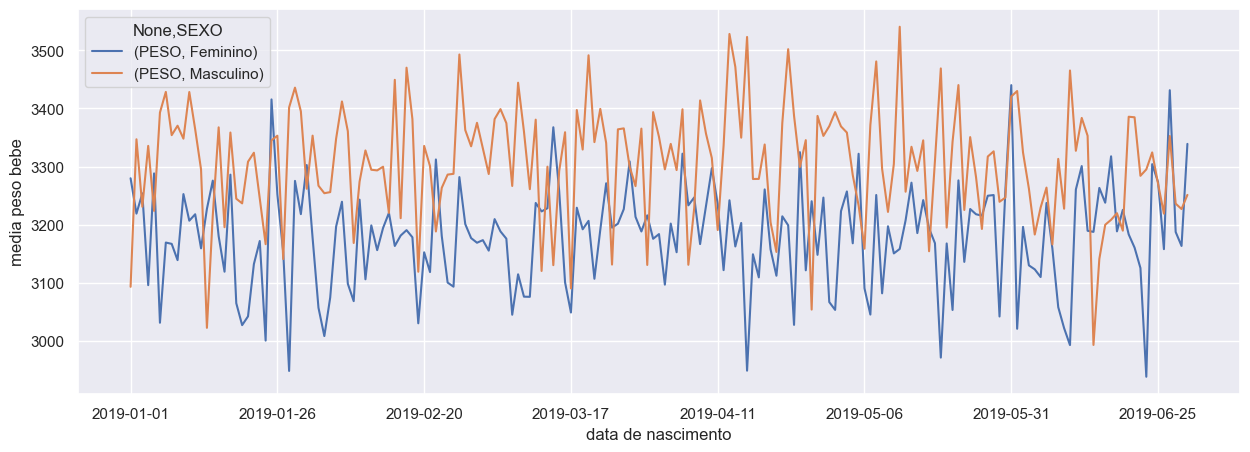

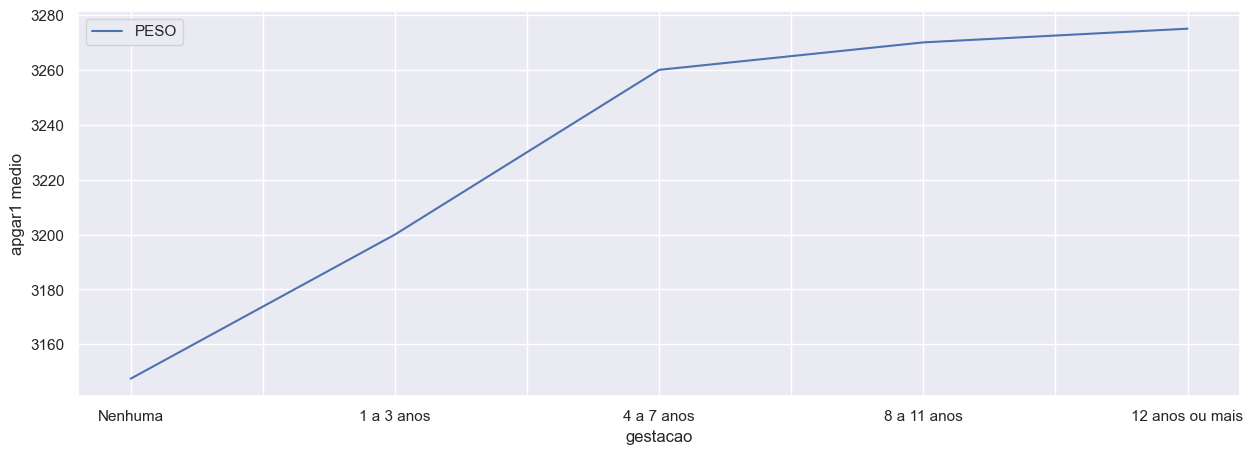

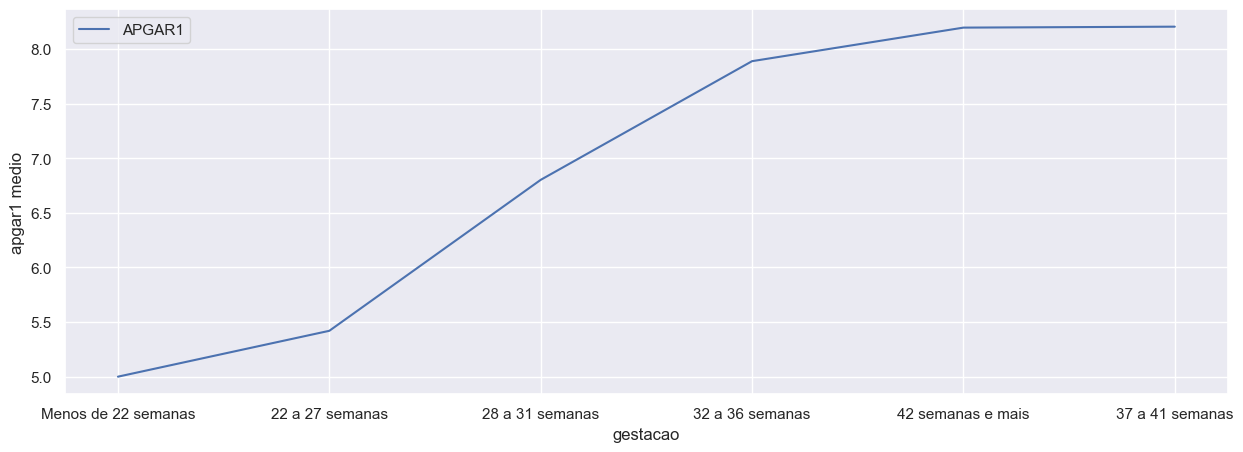

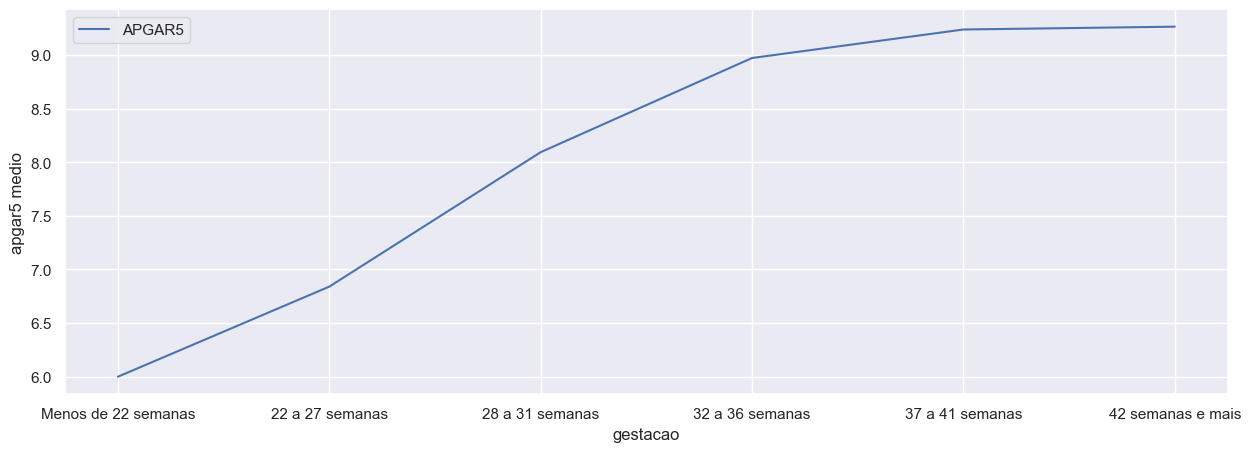

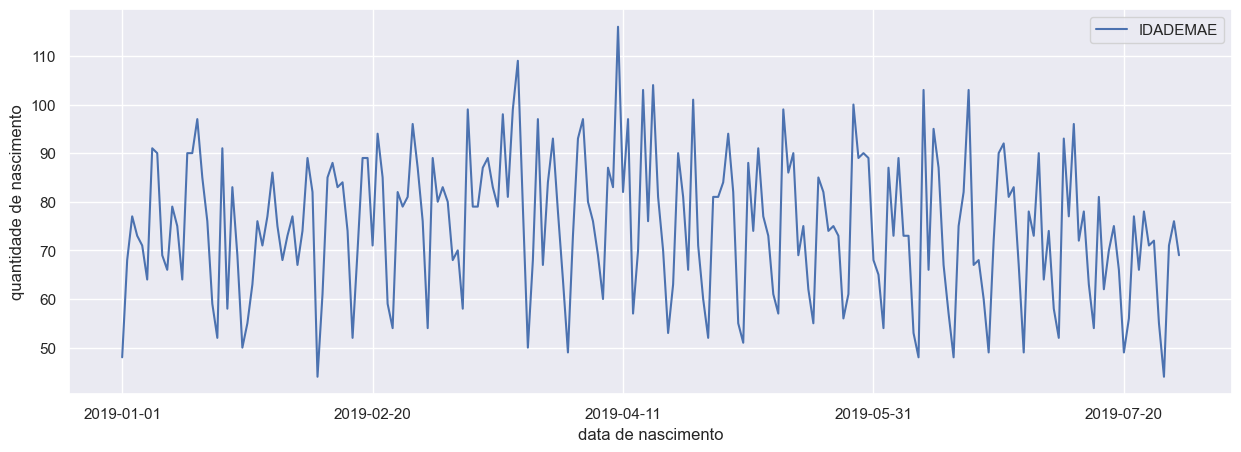

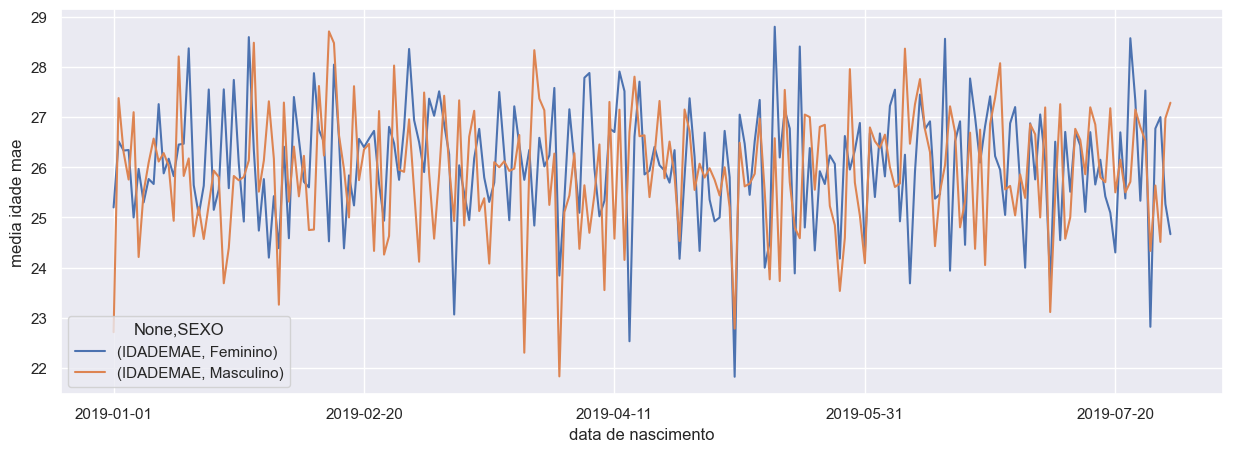

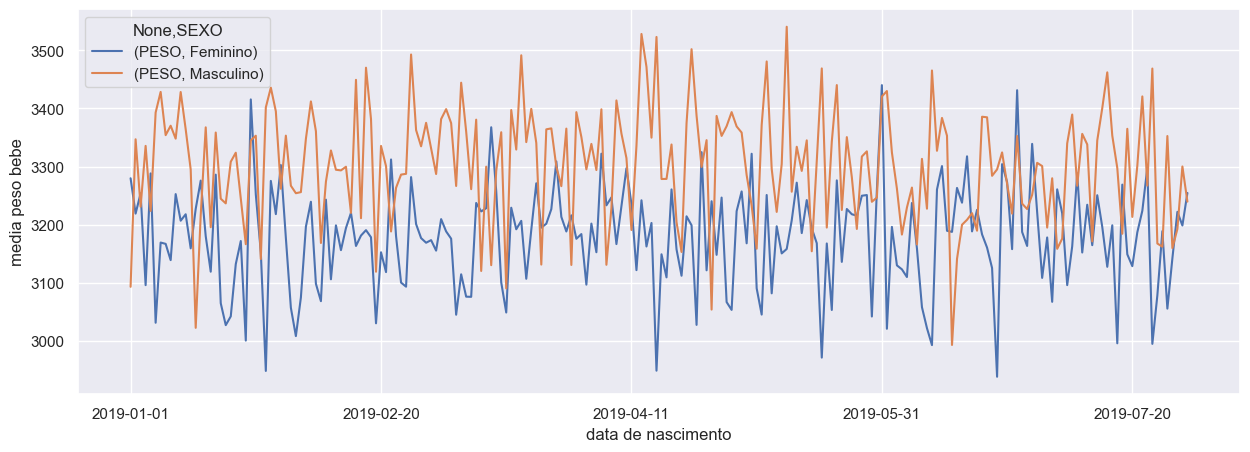

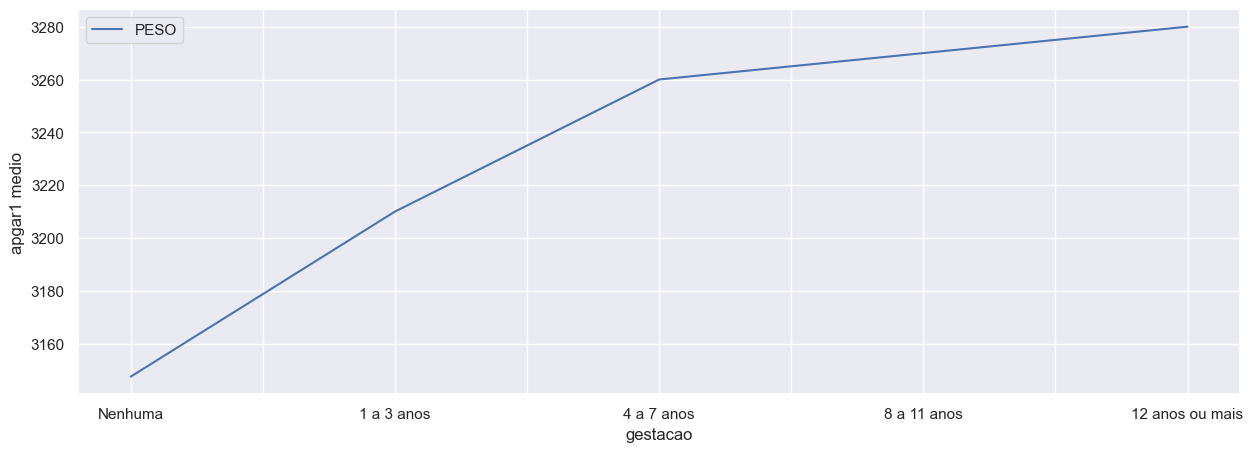

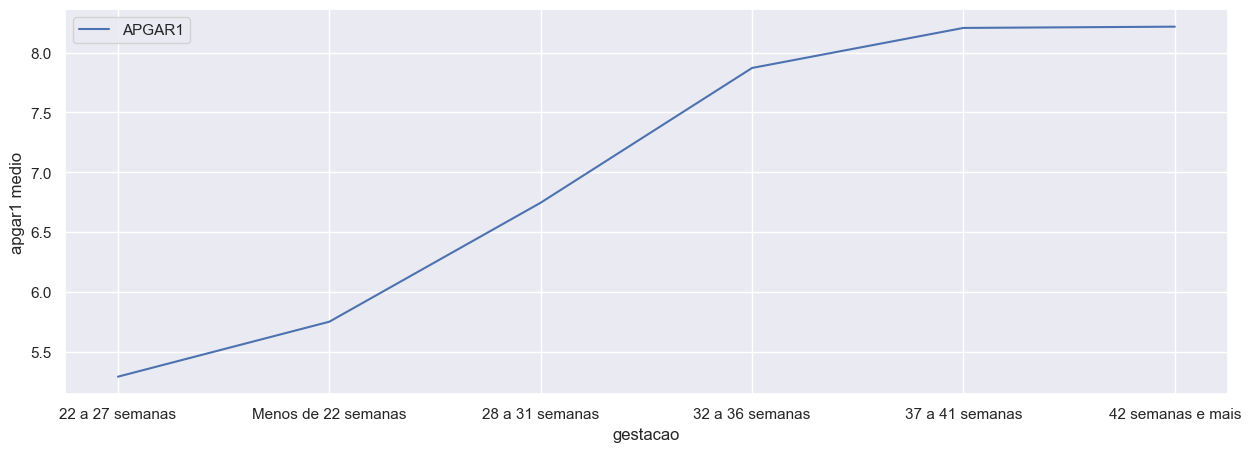

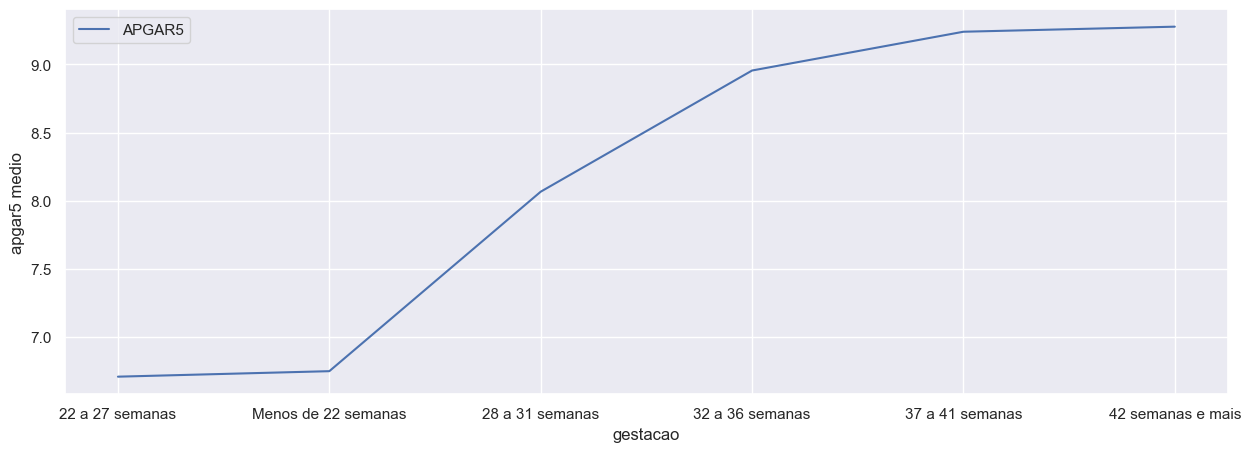

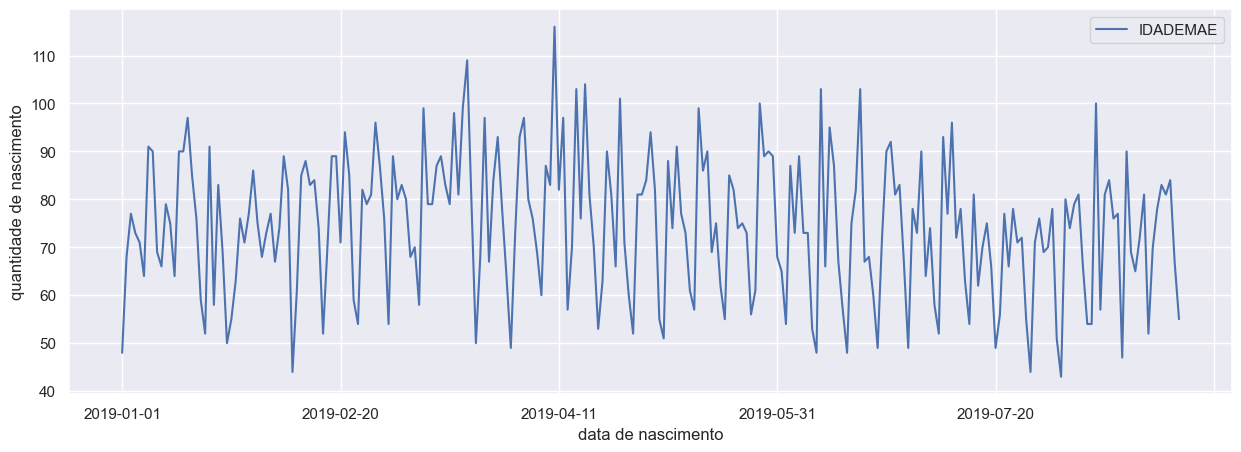

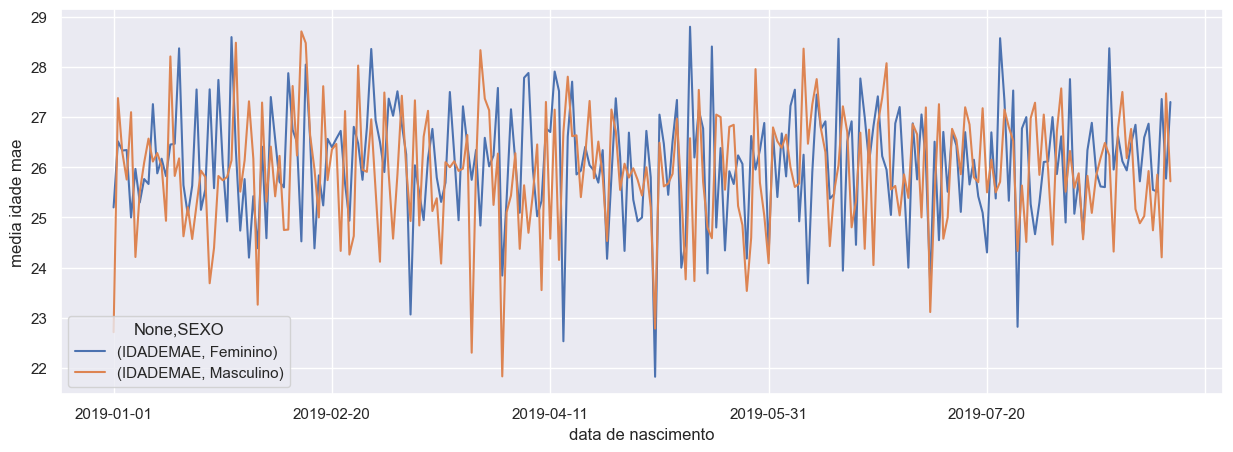

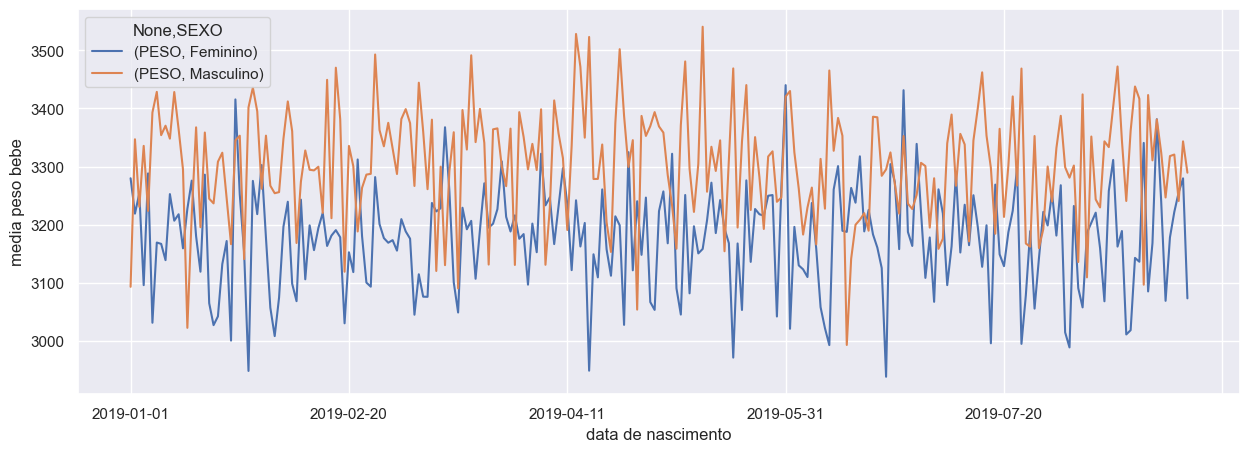

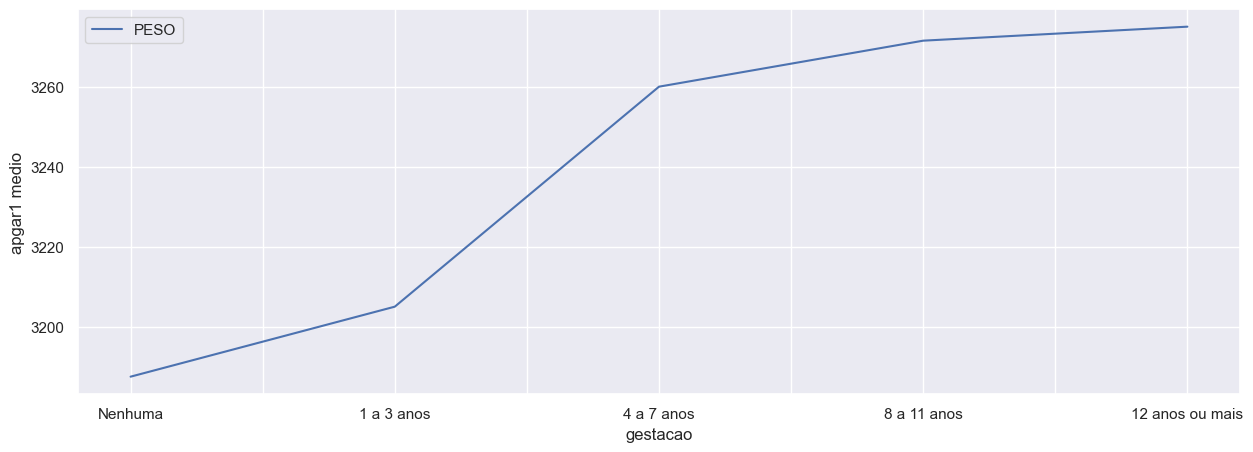

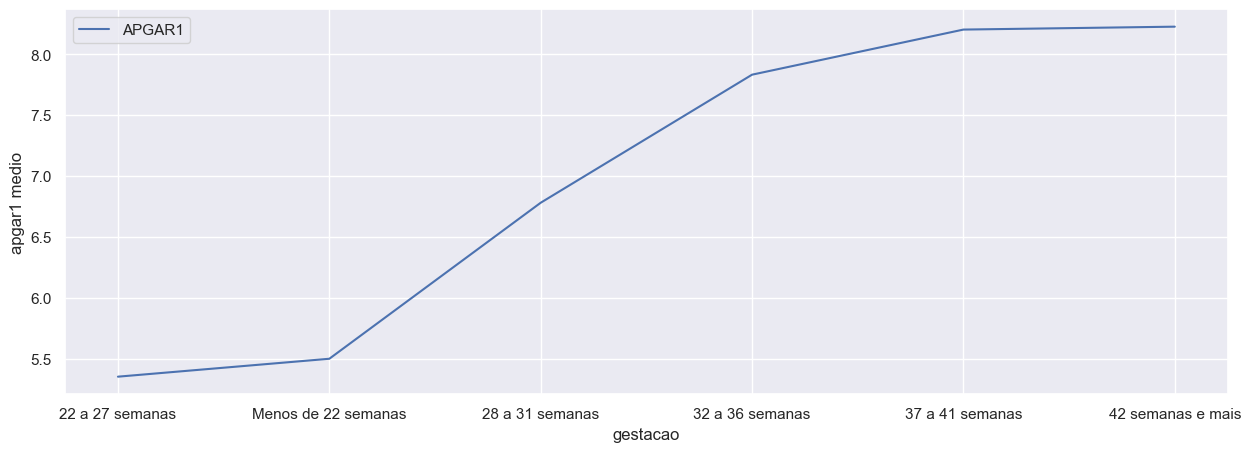

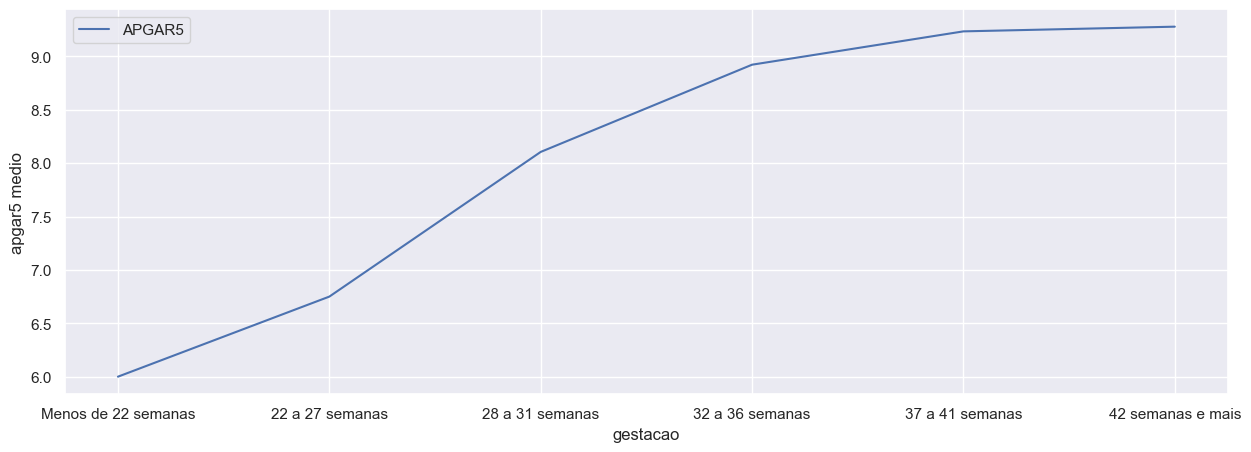

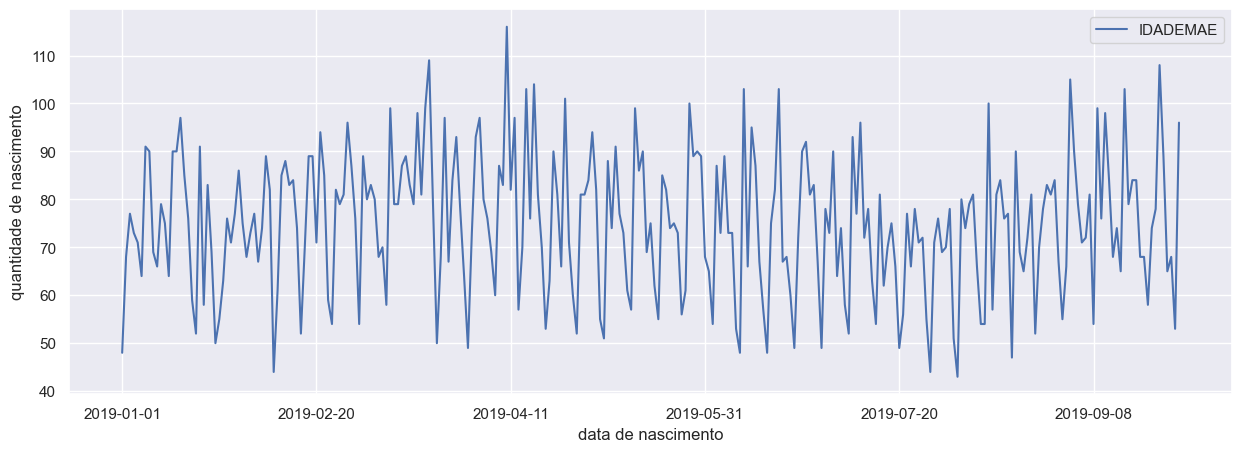

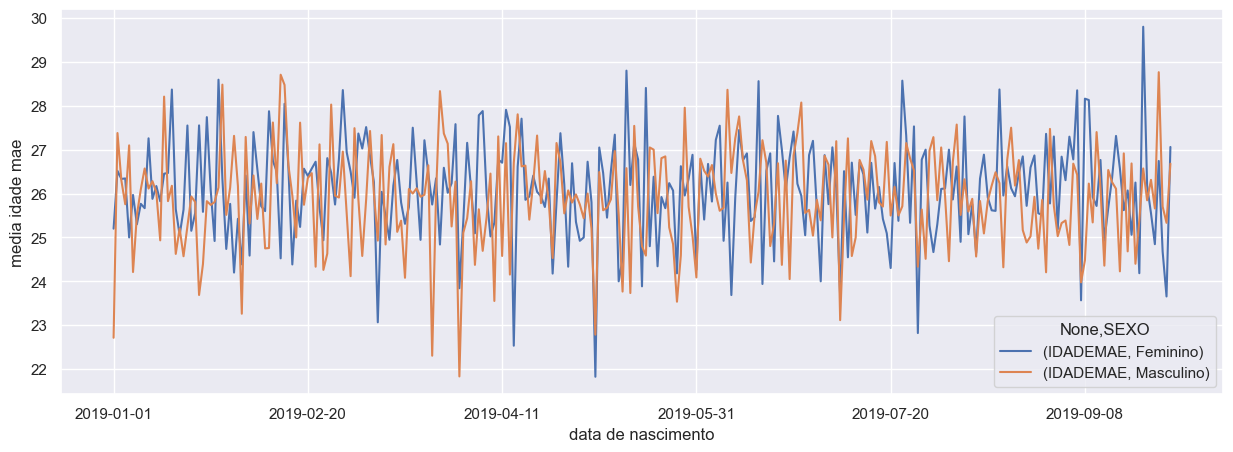

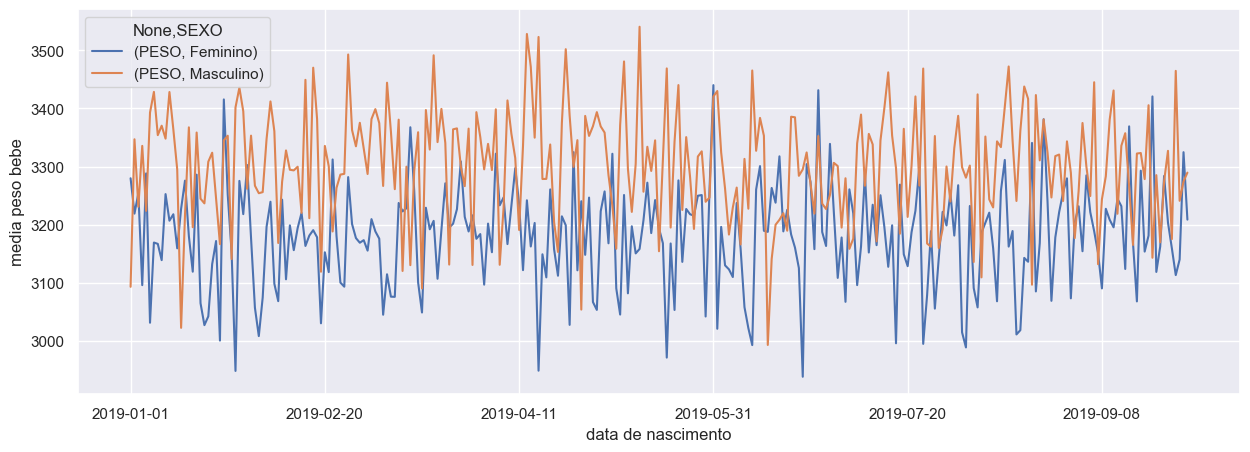

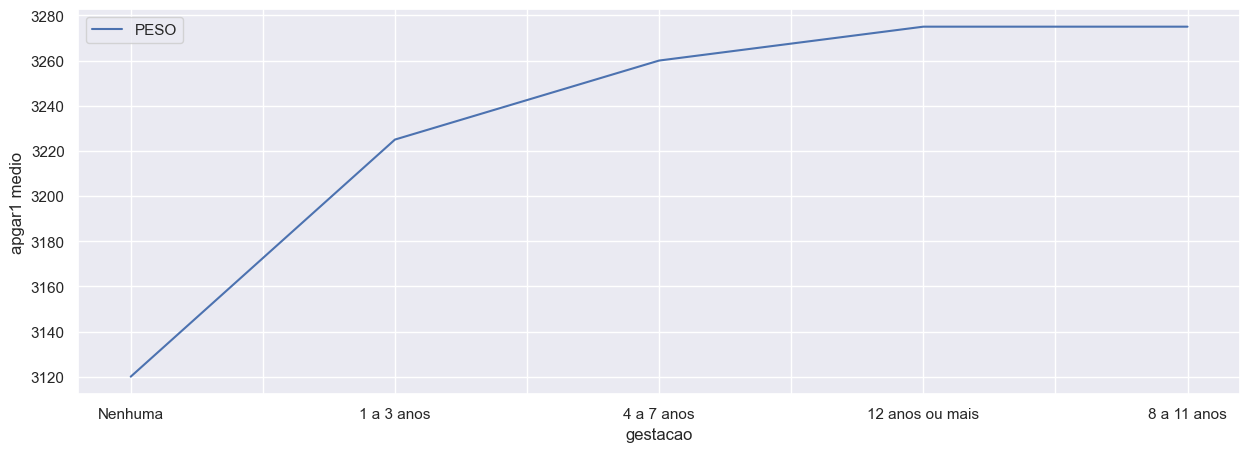

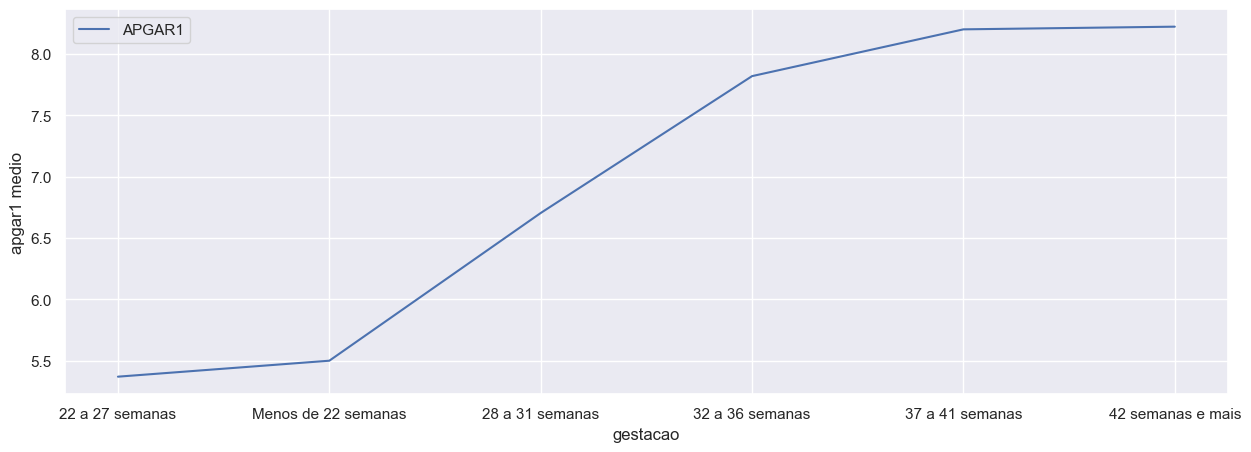

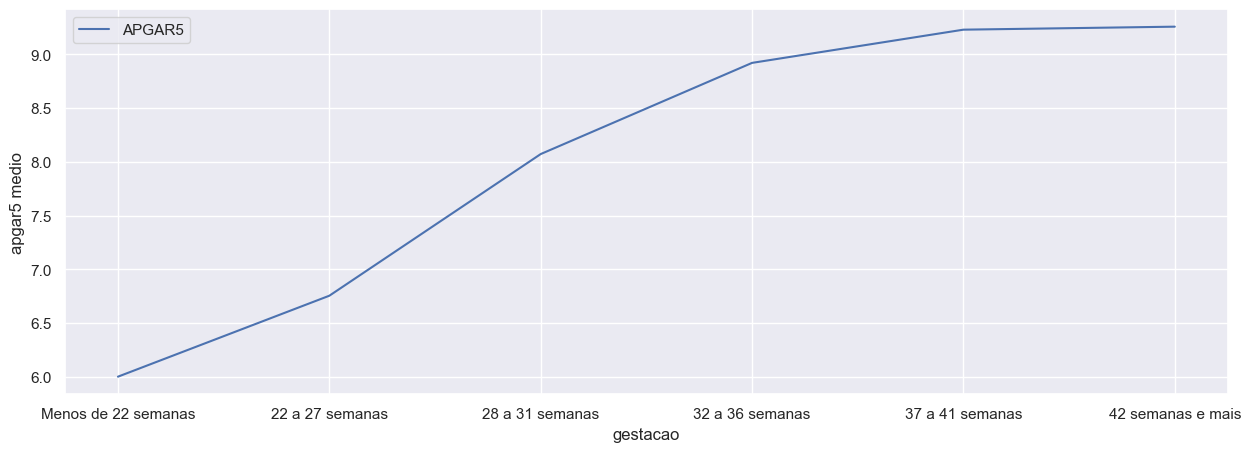

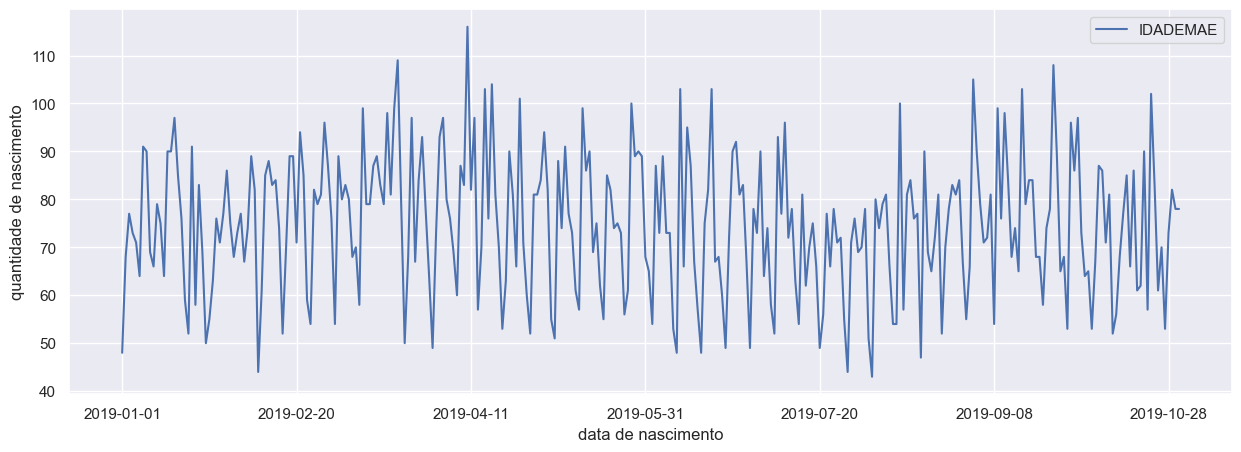

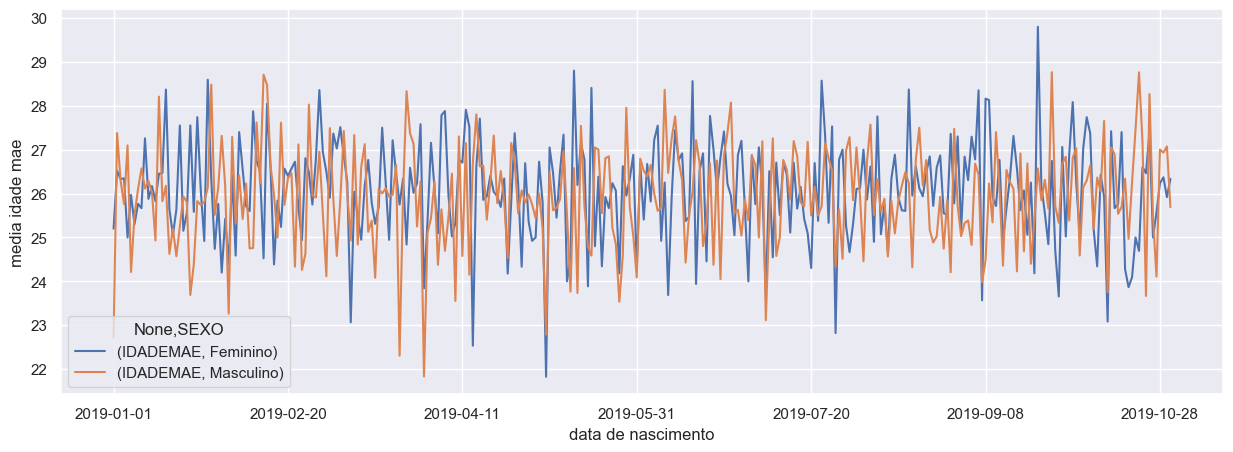

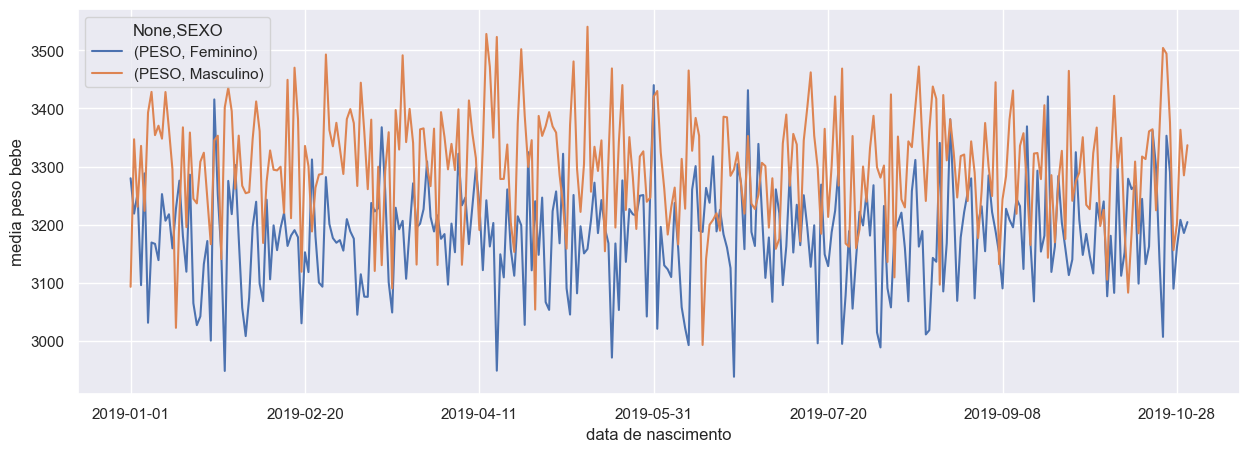

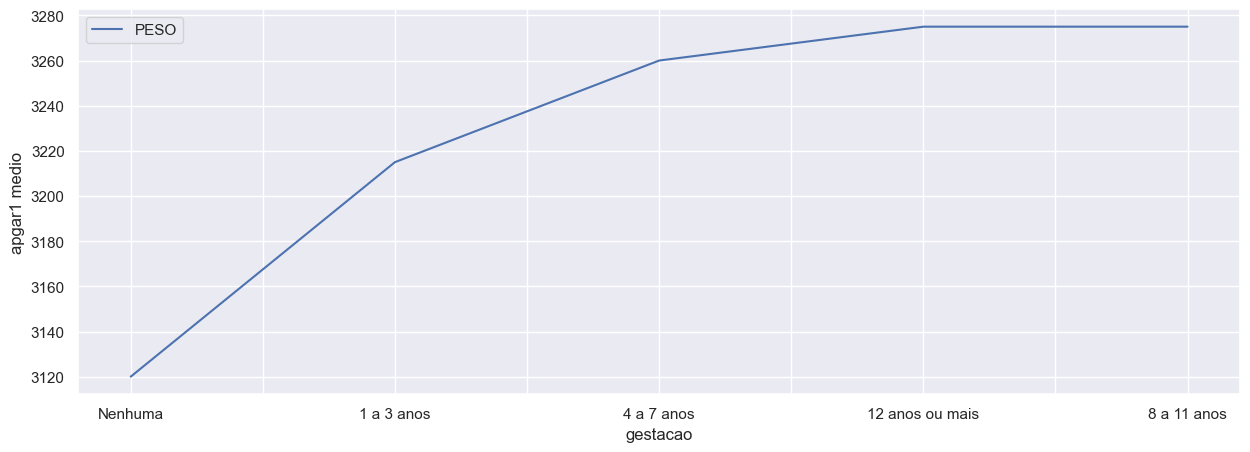

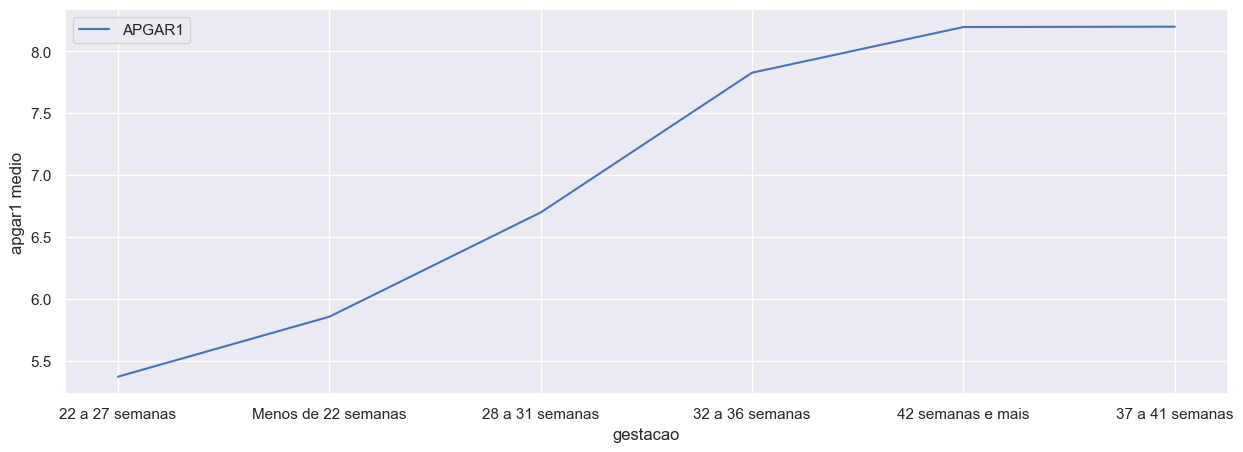

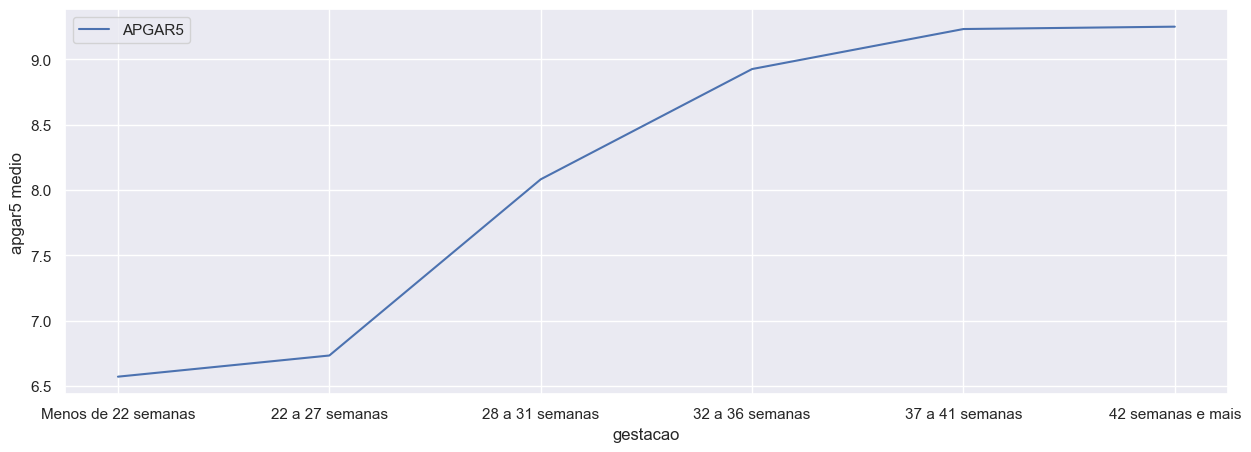

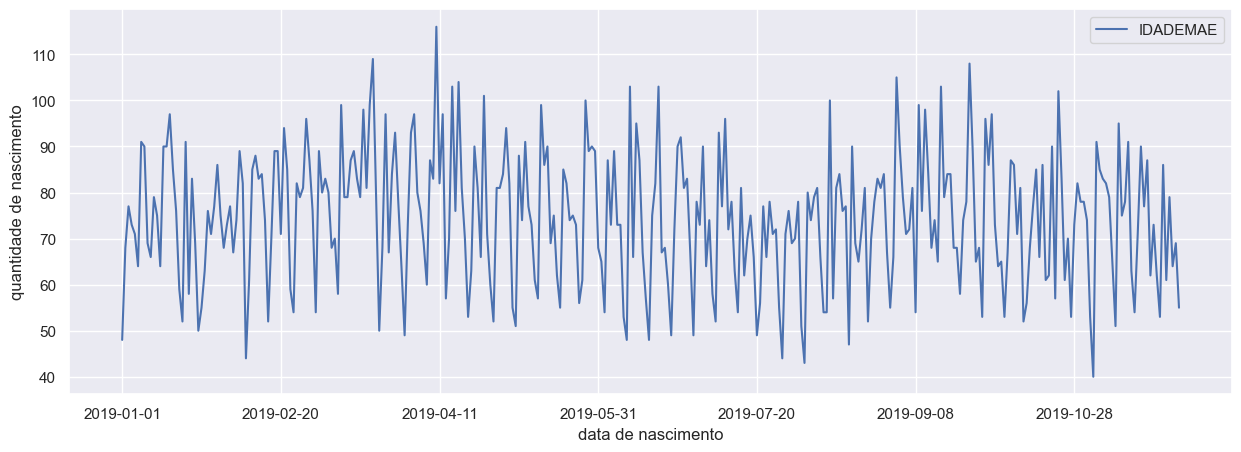

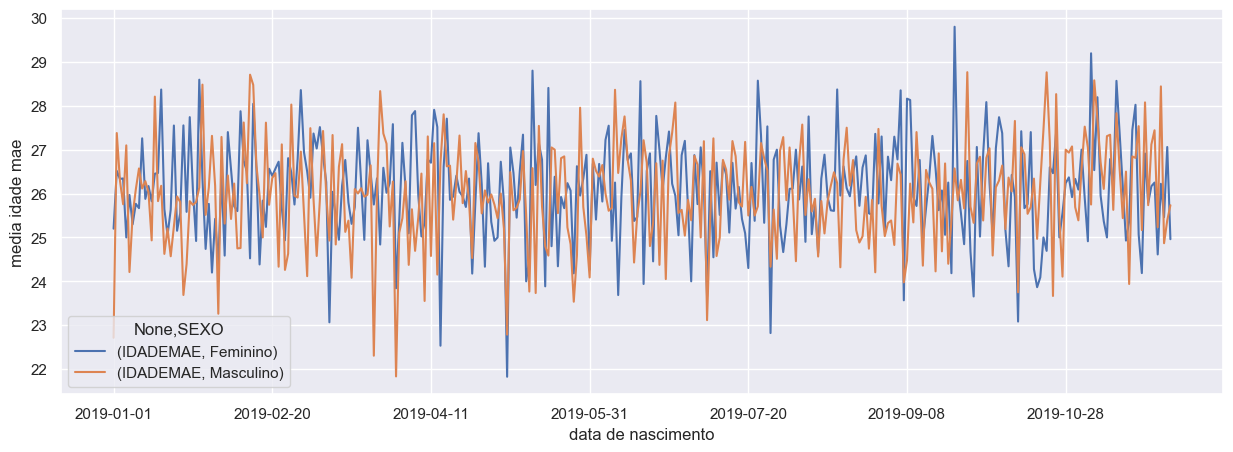

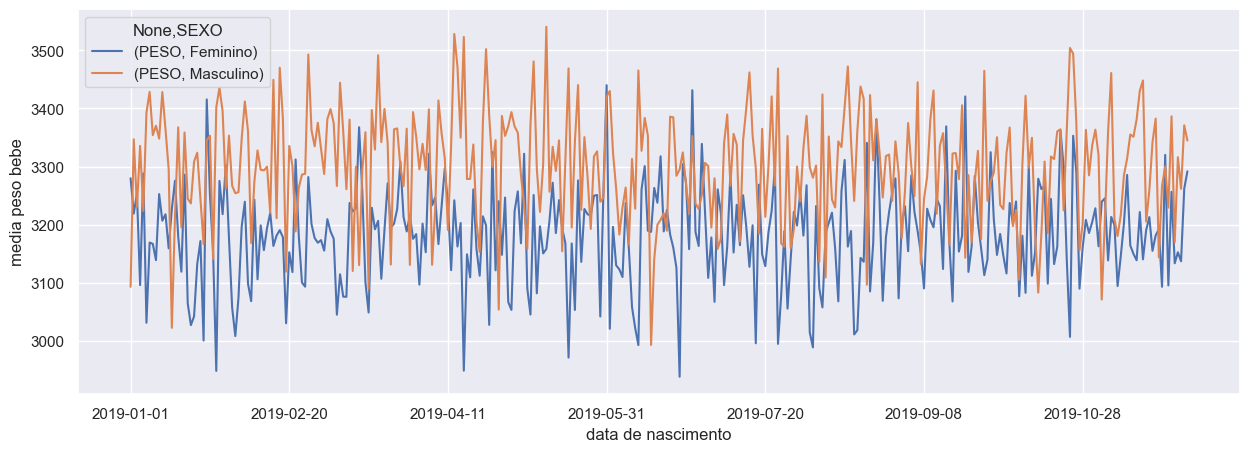

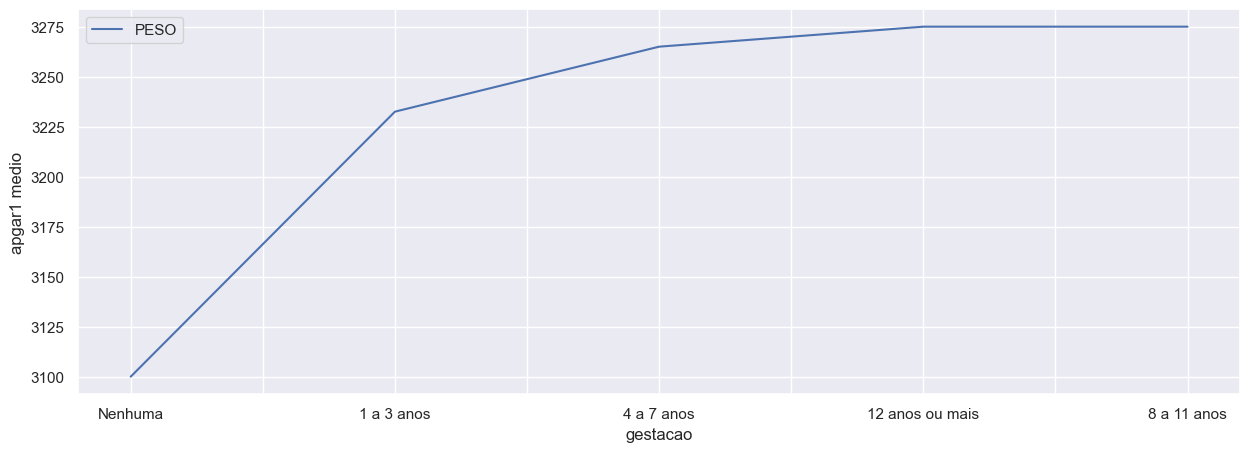

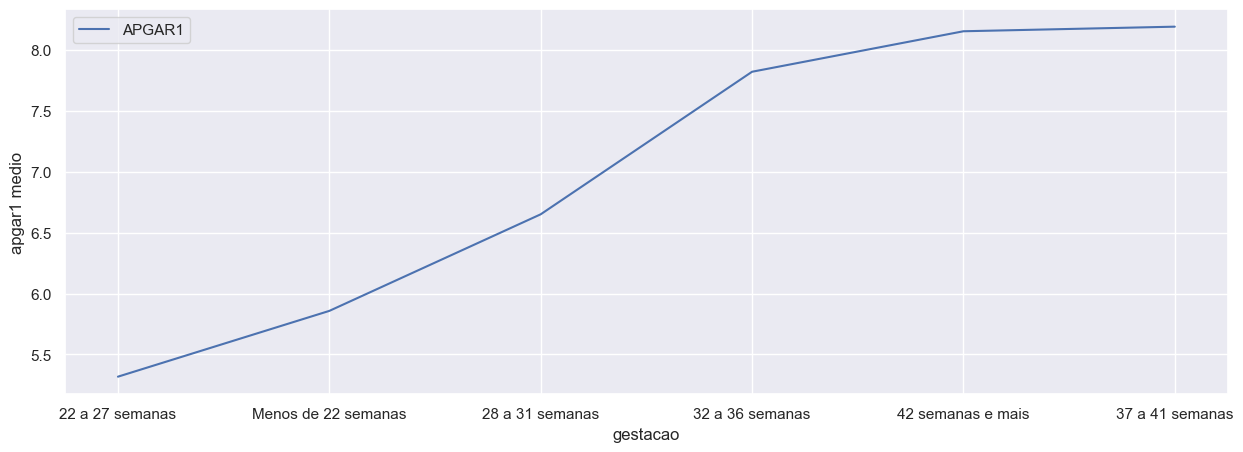

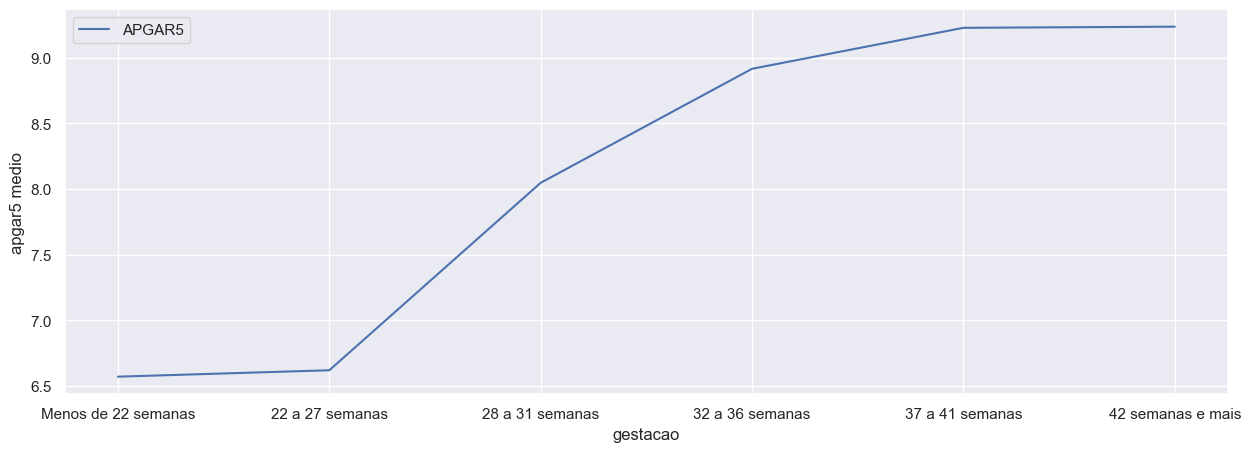

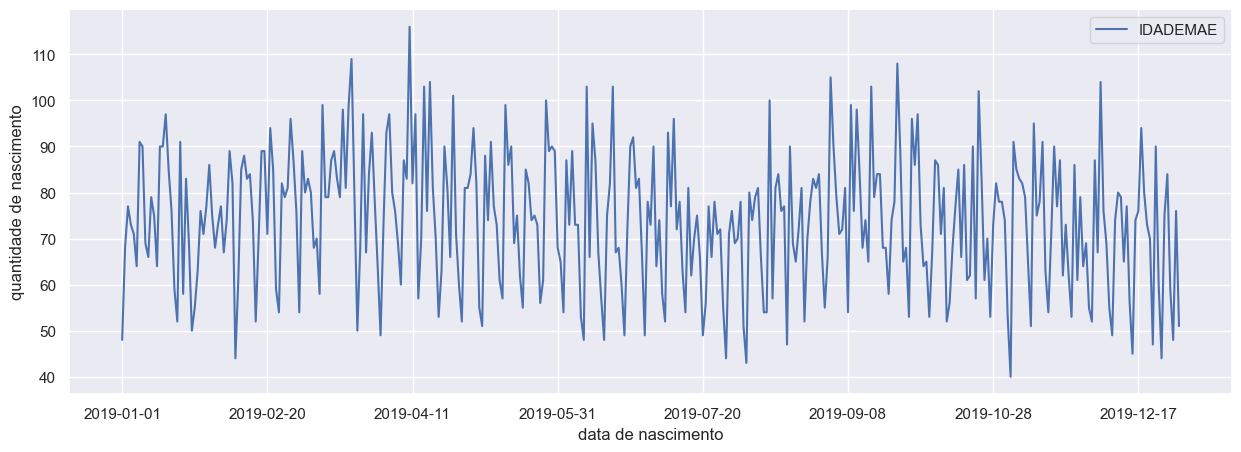

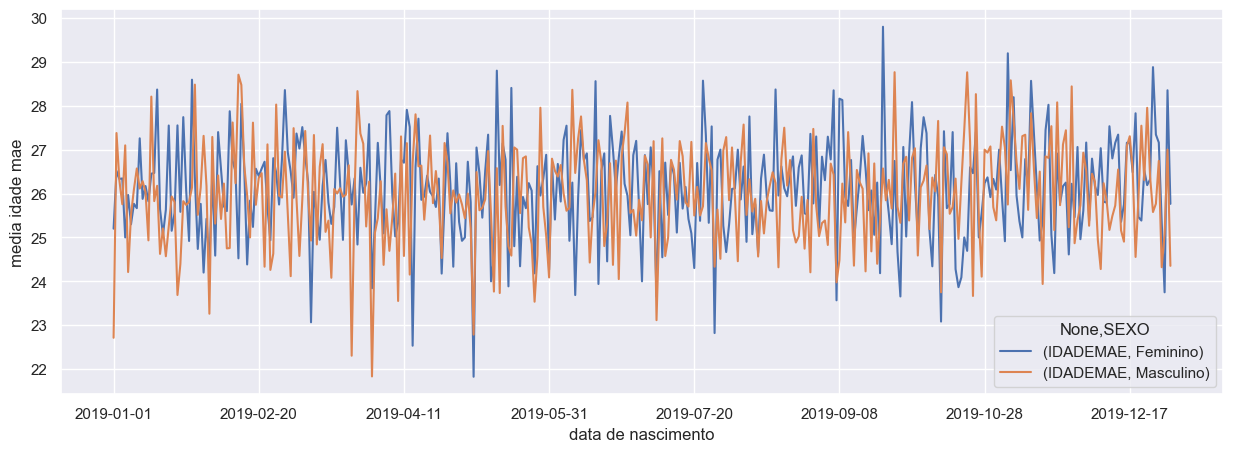

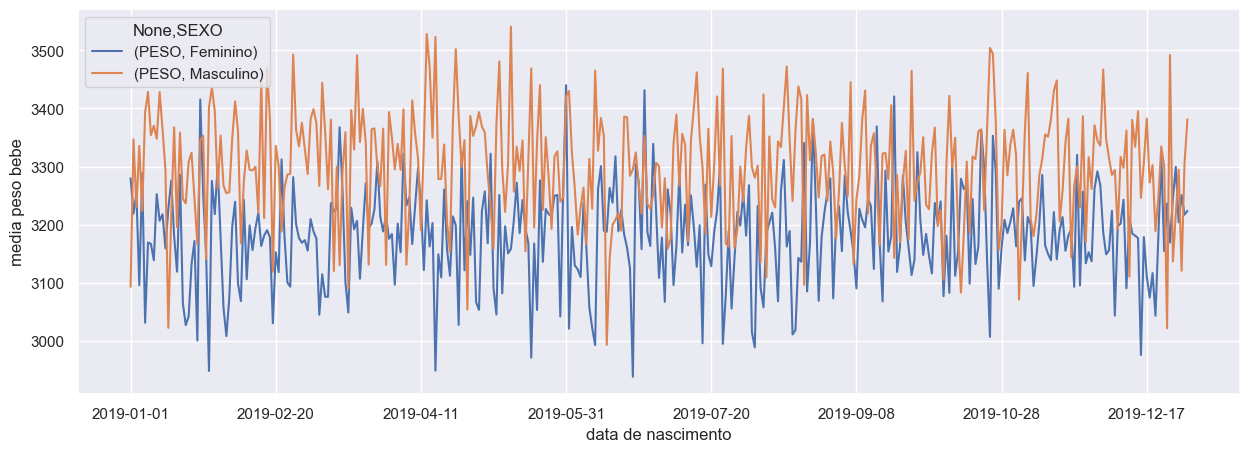

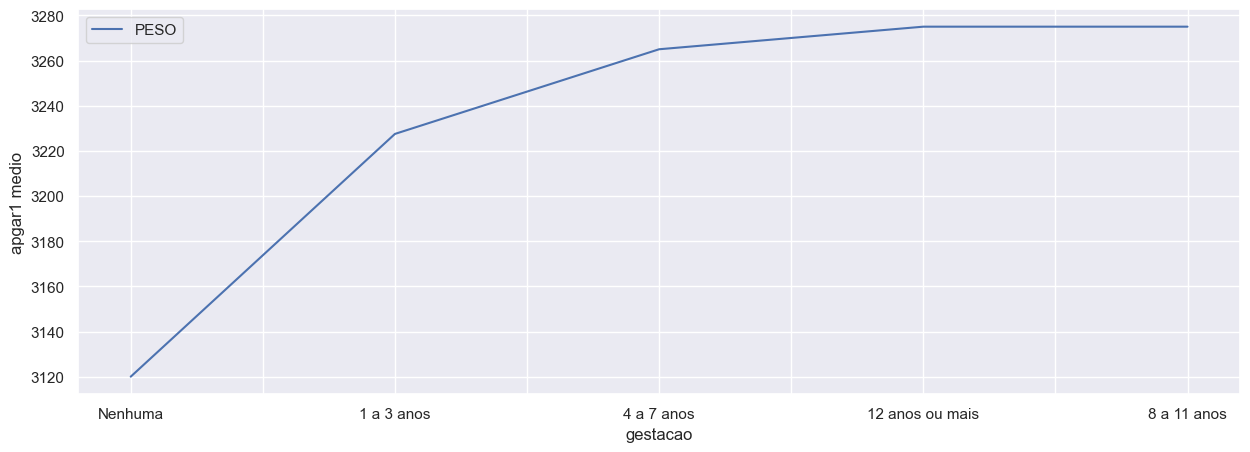

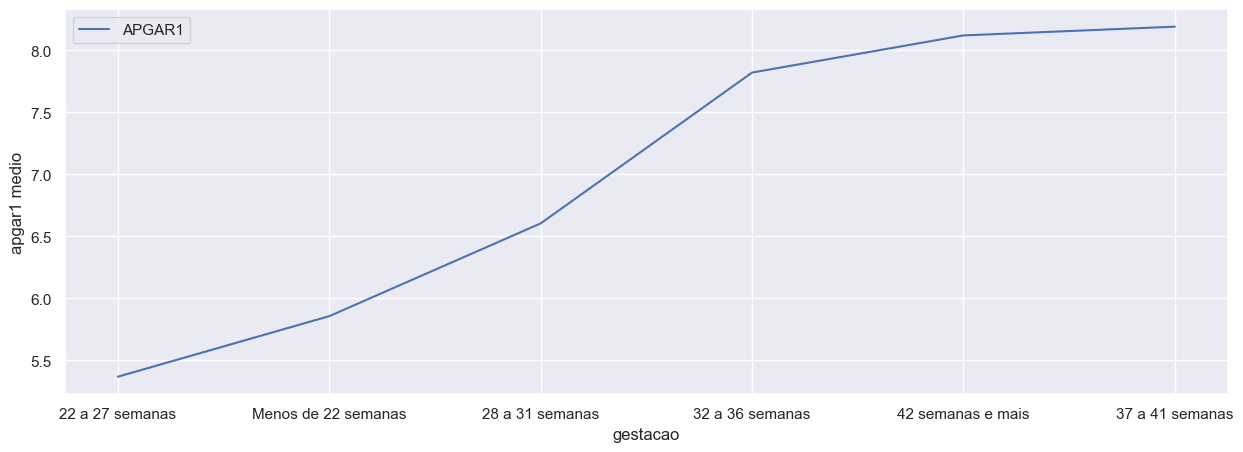

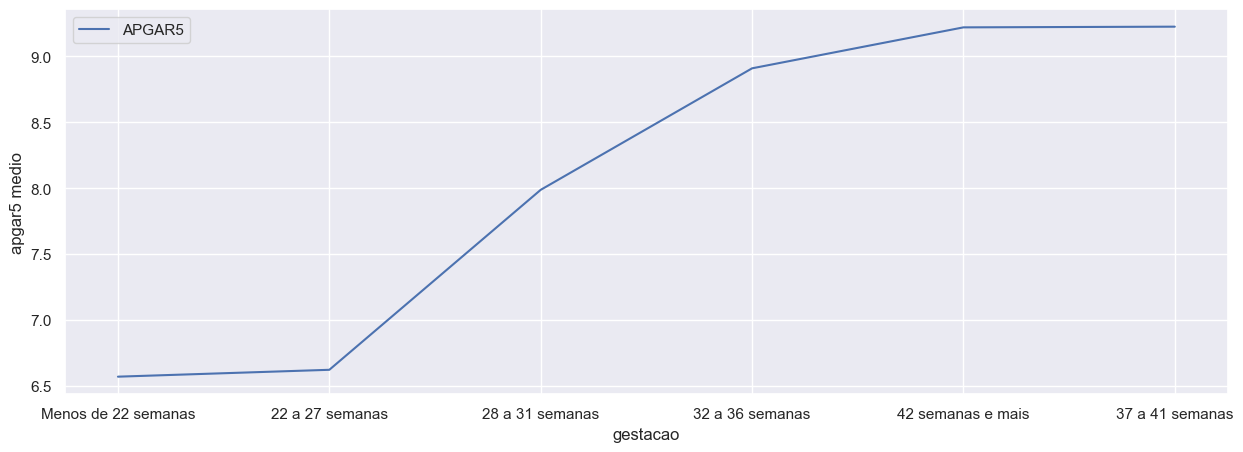

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

for mes in meses:

    sinasc = mes
    print(sinasc.DTNASC.min(), sinasc.DTNASC.max())

    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)
    os.makedirs('./output/figs/'+max_data, exist_ok=True)


    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')
    plt.savefig('./output/figs/'+max_data+'/quantidade de nascimento.png')

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por escolaridade mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

    plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar5 por gestacao.png')

- ### Como que você poderia fazer para deixar isso mais automatizado? Descreva na última célula do jupyter notebook o que ajudaria na hora de gerar novos gráficos pros meses/anos seguintes.<br>
**Resposta:** Como vimos na primeira célula deste notebook, eu peguei o DataFrame padrão **'SINASC_RO_2019.csv'** e separei pelos meses a serem analisados, em seguida armazenei em uma lista (**'meses'**). Depois na fórmula abaixo fiz um **'for mes in meses:'**. Com isso gerei o relatório do ano inteiro.